# HR Analytics Project- Understanding the Attrition in HR

## Adeeb Naiyer
## Batch DS2402

# Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
# Open the zip file
zf = zipfile.ZipFile('ibm-hr-analytics-employee-attrition-performance.zip') 

# Extract the csv file
df = pd.read_csv(zf.open('WA_Fn-UseC_-HR-Employee-Attrition.csv'))
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# 1. EDA

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

The dataset contains 1470 rows and 35 columns. Out of which 1 is the target variable "Attrition" and the remaining 34 are independent variables described as follows:

Age: Employee age

Attrition : Employee leaving the company (0=No, 1=Yes)

BusinessTravel : (1=Non-Travel, 2=Travel_Frequently, 3=Travel_Rarely)

DailyRate : Numerical Value - Salary Level

Department : (1=Human Resources, 2=Research & Development, 3=Sales)

DistanceFromHome : Numerical Value - THE DISTANCE FROM WORK TO HOME

Education : Numerical Value

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

EducationField : (1=Human Resources, 2=Life Sciences, 3=Marketing, 4=Medical, 5=Other, 6=Technical Degree)

EmployeeCount : Numerical Value

EmployeeNumber : EMPLOYEE ID

EnvironmentSatisfaction : Numerical Value - SATISFACTION WITH THE ENVIROMENT

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

Gender : (1=Female, 2=Male)

HourlyRate : Numerical Value - HOURLY SALARY

JobInvolvement : Numerical Value - JOB INVOLVEMENT

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

JobLevel : Numerical Value - LEVEL OF JOB

JobRole : (1=Healthcare Representative, 2=Human Resources, 3=Laboratory Technician, 4=Manager, 5=Manufacturing Director, 6=Research Director, 7= Research Scientist, 8=Sales Executive, 9=Sales Representative)

JobSatisfaction : Numerical Value - SATISFACTION WITH THE JOB (same as JobInvolvement)

MaritalStatus : (1=Divorced, 2=Married, 3=Single)

MonthlyIncome : Numerical Value - MONTHLY SALARY

MonthlyRate : Numerical Value - MONTHY RATE

NumCompaniesWorked : Numerical Value - NO. OF COMPANIES WORKED AT

Over18 : (1=Yes, 2=No)

OverTime : (1=No, 2=Yes)

PercentSalaryHike : Numerical Value - PERCENTAGE INCREASE IN SALARY

PerformanceRating : Numerical Value - ERFORMANCE RATING

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'

RelationshipSatisfaction : Numerical Value - RELATIONS SATISFACTION (same as JobInvolvement)

StandardHours : Numerical Value - STANDARD HOURS

StockOptionLevel : Numerical Value - STOCK OPTIONS

TotalWorkingYears : Numerical Value - TOTAL YEARS WORKED

TrainingTimesLastYear : Numerical Value - HOURS SPENT TRAINING

WorkLifeBalance : Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE

1 'Bad'

2 'Good'

3 'Better'

4 'Best'

YearsAtCompany : Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY

YearsInCurrentRole : Numerical Value -YEARS IN CURRENT ROLE

YearsSinceLastPromotion : Numerical Value - LAST PROMOTION

YearsWithCurrManage : Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Ref: https://github.com/matiaga/Fliprobo-Projects/blob/main/03.%20HR%20Analytics%20Attrition%20Project.ipynb

In [5]:
# checking the types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### We can observe there are no null values

## Missing values

In [6]:
# checking the null values in the training dataset
miss_val = df.isnull().sum().to_frame("Missing values")
miss_val

Missing values
Age                                    0
Attrition                              0
BusinessTravel                         0
DailyRate                              0
Department                             0
DistanceFromHome                       0
Education                              0
EducationField                         0
EmployeeCount                          0
EmployeeNumber                         0
EnvironmentSatisfaction                0
Gender                                 0
HourlyRate                             0
JobInvolvement                         0
JobLevel                               0
JobRole                                0
JobSatisfaction                        0
MaritalStatus                          0
MonthlyIncome                          0
MonthlyRate                            0
NumCompaniesWorked                     0
Over18                                 0
OverTime                               0
PercentSalaryHike                      0
PerformanceRating                      0
RelationshipSatisfaction               0
StandardHours                          0
StockOptionLevel                       0
TotalWorkingYears                      0
TrainingTimesLastYear                  0
WorkLifeBalance                        0
YearsAtCompany                         0
YearsInCurrentRole                     0
YearsSinceLastPromotion                0
YearsWithCurrManager                   0

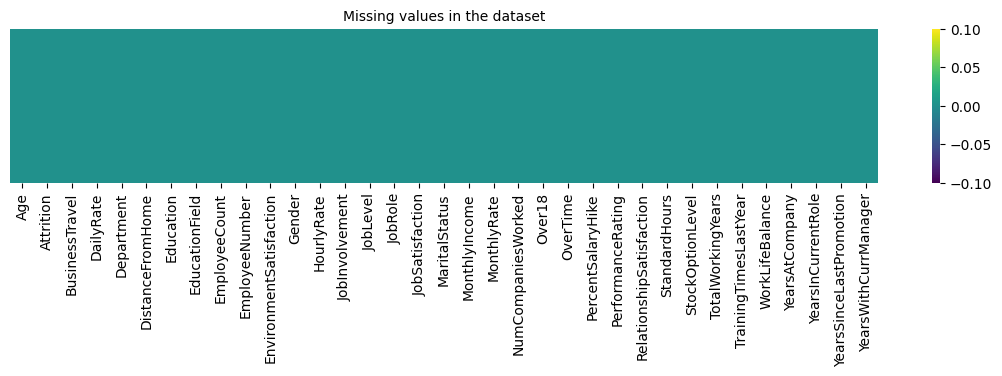

In [7]:
# visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values in the dataset', fontsize=10);

### Separating numerical and categorical columns

## Feature analysis

In [8]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

No. of Unique values    type
Age                                         43   int64
Attrition                                    2  object
BusinessTravel                               3  object
DailyRate                                  886   int64
Department                                   3  object
DistanceFromHome                            29   int64
Education                                    5   int64
EducationField                               6  object
EmployeeCount                                1   int64
EmployeeNumber                            1470   int64
EnvironmentSatisfaction                      4   int64
Gender                                       2  object
HourlyRate                                  71   int64
JobInvolvement                               4   int64
JobLevel                                     5   int64
JobRole                                      9  object
JobSatisfaction                              4   int64
MaritalStatus                                3  object
MonthlyIncome                             1349   int64
MonthlyRate                               1427   int64
NumCompaniesWorked                          10   int64
Over18                                       1  object
OverTime                                     2  object
PercentSalaryHike                           15   int64
PerformanceRating                            2   int64
RelationshipSatisfaction                     4   int64
StandardHours                                1   int64
StockOptionLevel                             4   int64
TotalWorkingYears                           40   int64
TrainingTimesLastYear                        7   int64
WorkLifeBalance                              4   int64
YearsAtCompany                              37   int64
YearsInCurrentRole                          19   int64
YearsSinceLastPromotion                     16   int64
YearsWithCurrManager                        18   int64

### Observation: 
We can observe the EmployeeNumber, EmployeeCount, Over18, StandardHours  has same only 1 unique value so it has no contribution to the target variable. We can drop all these columns

In [9]:
# Dropping the columns EmployeeNumber, EmployeeCount, Over18, and StandardHours
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
display(df.sample(5))

Age Attrition BusinessTravel  DailyRate              Department  \
1031   46       Yes  Travel_Rarely        377                   Sales   
1000   52        No  Travel_Rarely        258  Research & Development   
141    45        No  Travel_Rarely       1316  Research & Development   
1286   40        No  Travel_Rarely        616  Research & Development   
1390   28       Yes  Travel_Rarely       1404  Research & Development   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
1031                 9          3         Marketing                        1   
1000                 8          4             Other                        3   
141                 29          3           Medical                        3   
1286                 2          2     Life Sciences                        3   
1390                17          3  Technical Degree                        3   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
1031    Male  ...                  3                         1   
1000  Female  ...                  3                         3   
141     Male  ...                  3                         2   
1286  Female  ...                  3                         4   
1390    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
1031                 1                28                      1   
1000                 0                12                      2   
141                  0                 9                      2   
1286                 1                 7                      5   
1390                 1                 6                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1031               4               7                   7   
1000               1               5                   4   
141                2               6                   5   
1286               2               4                   3   
1390               2               4                   1   

      YearsSinceLastPromotion YearsWithCurrManager  
1031                        4                    3  
1000                        0                    4  
141                         0                    3  
1286                        0                    2  
1390                        0                    3  

[5 rows x 31 columns]

In [10]:
df.shape

(1470, 31)

### Target Unique variables

In [11]:
# Checking the target variable
df['Attrition'].value_counts().to_frame()

count
Attrition       
No          1233
Yes          237

In [12]:
# Separating Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {cat_col}\n")
print(f"Numerical Columns:\n {num_col}\n")

num_cat_col = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
print(f"Numerical Columns that is a category:\n {num_cat_col}\n")

Categorical Columns:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Numerical Columns:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Numerical Columns that is a category:
 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']



### Checking the value counts

In [13]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.BusinessTravel:
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

2.Department:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

3.EducationField:
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

4.Gender:
 Gender
Male      882
Female    588
Name: count, dtype: int64

5.JobRole:
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

6.MaritalStatus:
 MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dty

In [14]:
# Checking the value counts of the Numerical Columns that represent a category:
for i, col in enumerate(num_cat_col):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.Education:
 Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

2.EnvironmentSatisfaction:
 EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

3.JobInvolvement:
 JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

4.JobLevel:
 JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

5.JobSatisfaction:
 JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

6.NumCompaniesWorked:
 NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

7.PerformanceRating:
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64

8.RelationshipSatisfaction:
 RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

9.StockOptionLevel:
 StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

10.WorkLifeBalance:
 WorkLifeBalanc

In [15]:
# Select the rest of the numerical columns
num_col = [col for col in num_col if col not in num_cat_col]
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [16]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(num_col):
    print(f"{i+1}.{col}:\n {df[col].value_counts()}\n")

1.Age:
 Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

2.DailyRate:
 DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

3.DistanceFromHome:
 DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

4.HourlyRate:
 HourlyRate
66    29
98    28
4

### Statistics summary

In [17]:
df.describe(exclude=[np.number])

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus OverTime  
count              1470          1470     1470  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                326           673     1054

In [18]:
# Summary statistics of numerical columns
stats = df.describe()

# First 9 columns
display(stats.iloc[:,:9])

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  
count      1470.000000  
mean          2.728571  
std           1.102846  
min           1.000000  
25%           2.000000  
50%           3.000000  
75%           4.000000  
max           4.000000

In [19]:

# Next 7 columns
display(stats.iloc[:,9:16])

MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count    1470.000000   1470.000000         1470.000000        1470.000000   
mean     6502.931293  14313.103401            2.693197          15.209524   
std      4707.956783   7117.786044            2.498009           3.659938   
min      1009.000000   2094.000000            0.000000          11.000000   
25%      2911.000000   8047.000000            1.000000          12.000000   
50%      4919.000000  14235.500000            2.000000          14.000000   
75%      8379.000000  20461.500000            4.000000          18.000000   
max     19999.000000  26999.000000            9.000000          25.000000   

       PerformanceRating  RelationshipSatisfaction  StockOptionLevel  
count        1470.000000               1470.000000       1470.000000  
mean            3.153741                  2.712245          0.793878  
std             0.360824                  1.081209          0.852077  
min             3.000000                  1.000000          0.000000  
25%             3.000000                  2.000000          0.000000  
50%             3.000000                  3.000000          1.000000  
75%             3.000000                  4.000000          1.000000  
max             4.000000                  4.000000          3.000000

In [20]:
# Last columns
display(stats.iloc[:,16:])

TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1470.000000  
mean               4.123129  
std                3.568136  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

#### Contrast the mean and the 50 % to findout the skewness

In [21]:
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

MonthlyIncome               1583.931293
MonthlyRate                   77.603401
DistanceFromHome               2.192517
YearsAtCompany                 2.008163
TotalWorkingYears              1.279592
YearsInCurrentRole             1.229252
PercentSalaryHike              1.209524
YearsSinceLastPromotion        1.187755
YearsWithCurrManager           1.123129
Age                            0.923810
NumCompaniesWorked             0.693197
DailyRate                      0.485714
PerformanceRating              0.153741
JobLevel                       0.063946
Education                     -0.087075
HourlyRate                    -0.108844
TrainingTimesLastYear         -0.200680
StockOptionLevel              -0.206122
WorkLifeBalance               -0.238776
JobInvolvement                -0.270068
JobSatisfaction               -0.271429
EnvironmentSatisfaction       -0.278231
RelationshipSatisfaction      -0.287755
dtype: float64

In [22]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

MonthlyIncome               4080.155141
YearsAtCompany                20.738786
TotalWorkingYears             13.158845
YearsInCurrentRole             6.524474
YearsSinceLastPromotion        6.367384
YearsWithCurrManager           5.740599
Age                            4.805443
DistanceFromHome               3.593754
PercentSalaryHike              2.470601
NumCompaniesWorked             1.310785
JobLevel                       0.722175
TrainingTimesLastYear          0.622139
StockOptionLevel               0.501969
PerformanceRating              0.124611
Education                      0.038745
JobInvolvement                -0.153054
WorkLifeBalance               -0.174176
RelationshipSatisfaction      -0.874663
EnvironmentSatisfaction       -0.907933
JobSatisfaction               -0.934264
HourlyRate                    -6.550012
DailyRate                   -110.503914
MonthlyRate                -1549.675489
dtype: float64

### Observation:

•The mean value is larger than the median in columns MonthlyIncome, MonthlyRate, DistanceFromHome, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, PercentSalaryHike, YearsSinceLastPromotion, YearsWithCurrManager, Age, NumCompaniesWorked, DailyRate, PerformanceRating, JobLevel, which means the data could be skewed to the right in these columns.

•The data in the columns RelationshipSatisfaction, EnvironmentSatisfaction, JobSatisfaction, JobInvolvement, WorkLifeBalance, StockOptionLevel, TrainingTimesLastYear, HourlyRate, Education have a small difference between the mean value less than the median which means the data probably is skewed to the left.

•The dataset could present outliers in the columns MonthlyIncome, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Age, DistanceFromHome, PercentSalaryHike, NumCompaniesWorked, however in the univariate analysis of each feature we will verify it.

•The features are not on the same scale. Features should be on the same scale for algorithms such as logistic regression to converge smoothly.

## Duplicates

In [23]:
df[df.duplicated()].shape


(0, 31)

# Data Visualisation

## Univariate Analysis

### Target

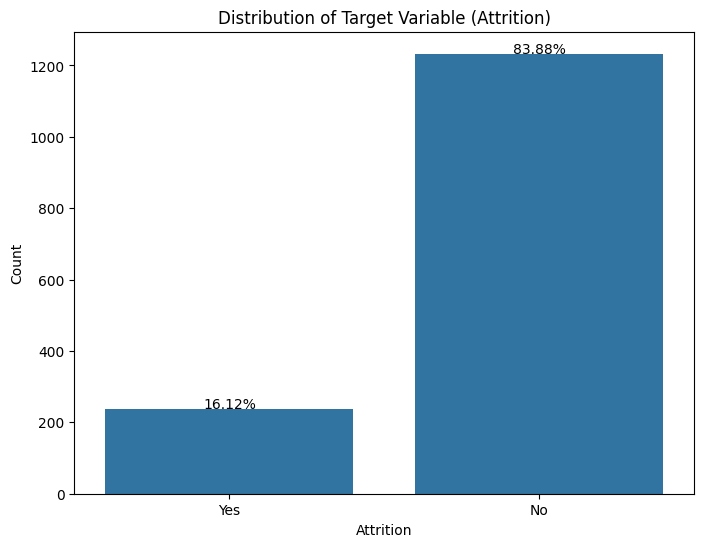

In [24]:
# Calculate the percentage of each category
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Attrition')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    percentage = height / df['Attrition'].count() * 100
    ax.text(p.get_x() + width / 2, height + 1, f'{percentage:.2f}%', ha="center")

plt.title('Distribution of Target Variable (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### Features (categorical columns)

1. Attrition


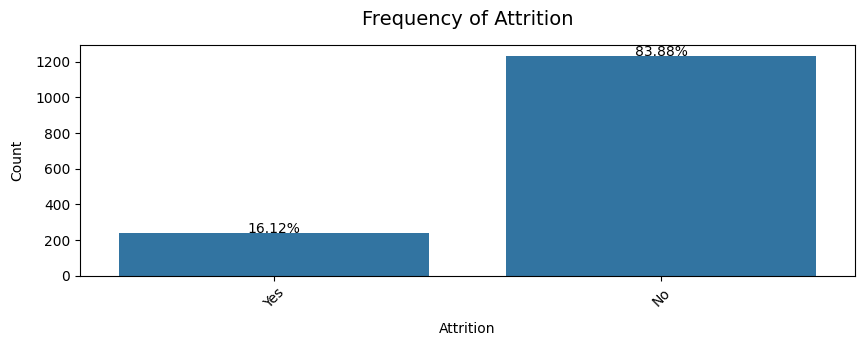

           proportion
Attrition            
No           0.838776
Yes          0.161224
2. BusinessTravel


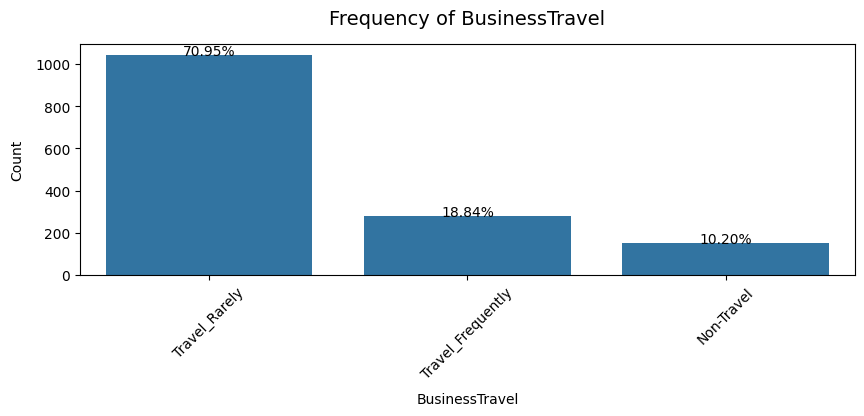

                   proportion
BusinessTravel               
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
3. Department


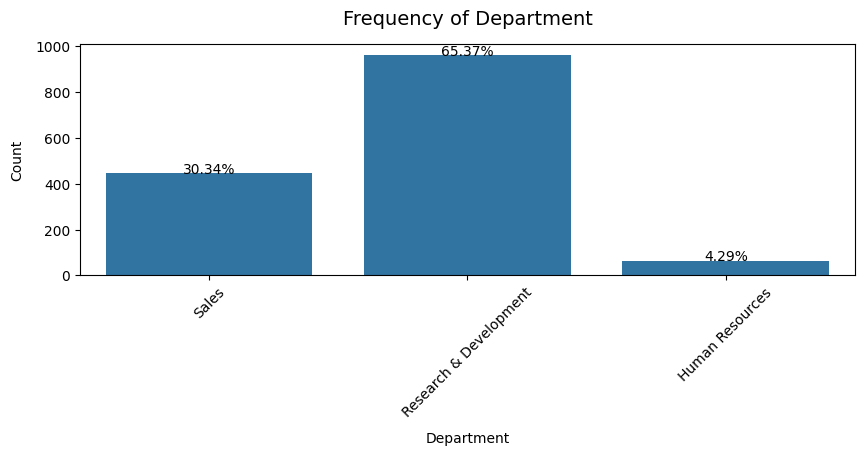

                        proportion
Department                        
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
4. EducationField


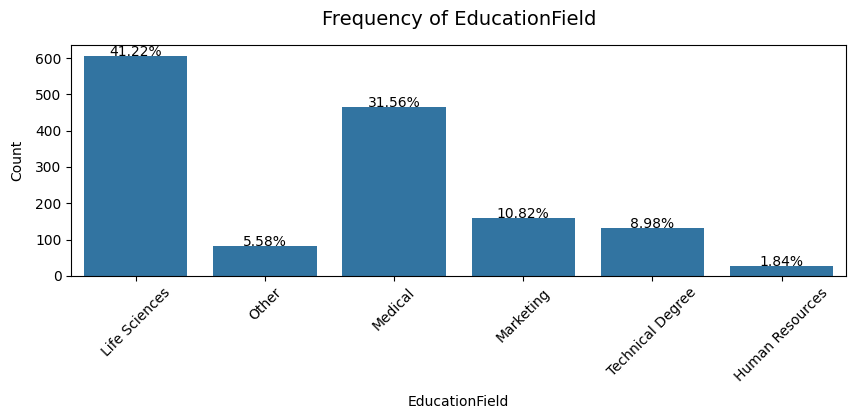

                  proportion
EducationField              
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
5. Gender


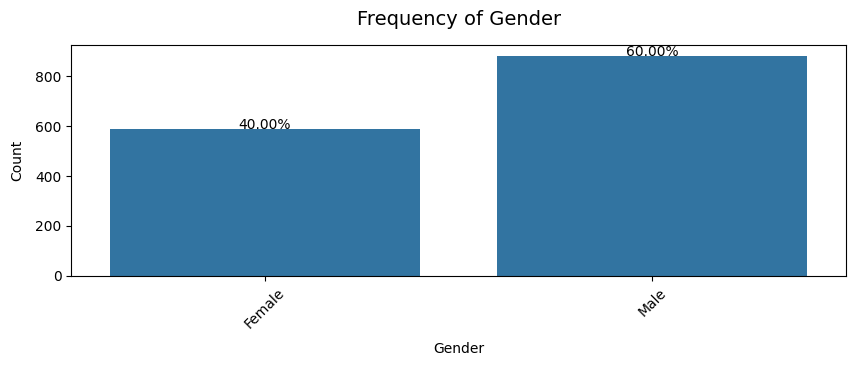

        proportion
Gender            
Male           0.6
Female         0.4
6. JobRole


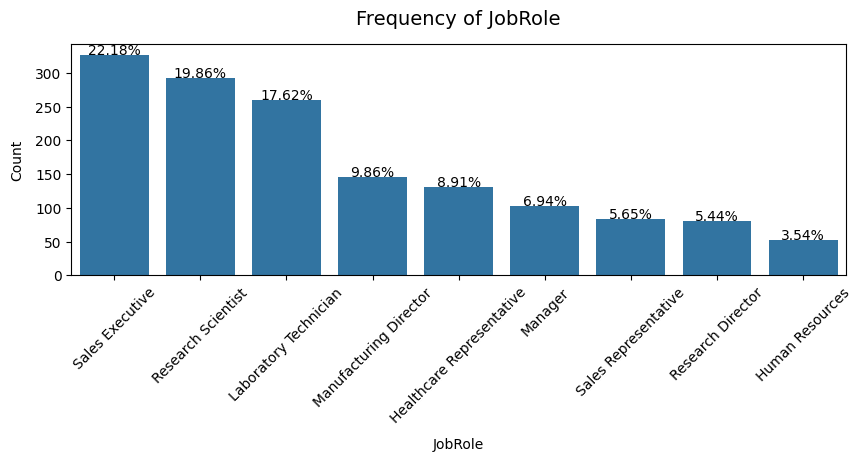

                           proportion
JobRole                              
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
7. MaritalStatus


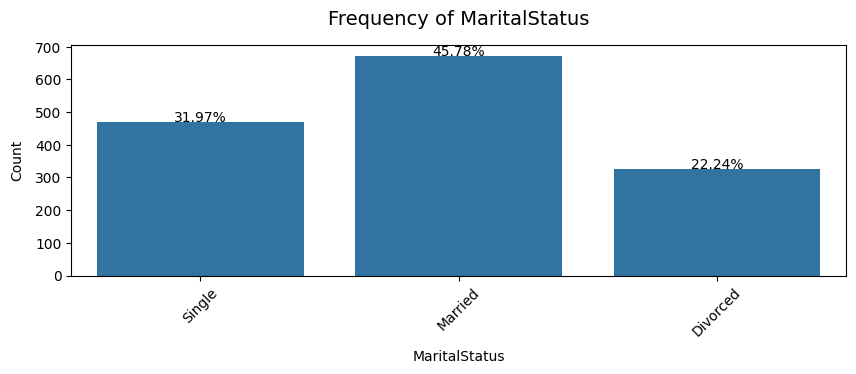

               proportion
MaritalStatus            
Married          0.457823
Single           0.319728
Divorced         0.222449
8. OverTime


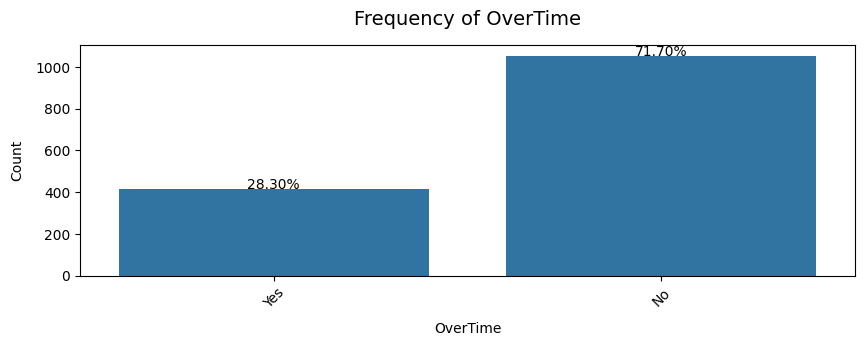

          proportion
OverTime            
No          0.717007
Yes         0.282993


In [25]:
def show_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        percentage = height / total_count * 100
        ax.text(p.get_x() + width / 2, height + 1, f'{percentage:.2f}%', ha="center")

for i, col in enumerate(cat_col):
    print(f"{i+1}. {col}")

    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=col, data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel(col, size=10, labelpad=8)
    plt.ylabel('Count', size=10, labelpad=8)
    plt.xticks(rotation=45, size=10)
    plt.title(f"Frequency of {col}", size=14, y=1.05)

    plt.show()

    # Display value counts as a DataFrame
    print(df[col].value_counts(normalize=True).to_frame())

## Features(Numerical but categorical columns)

1. Education


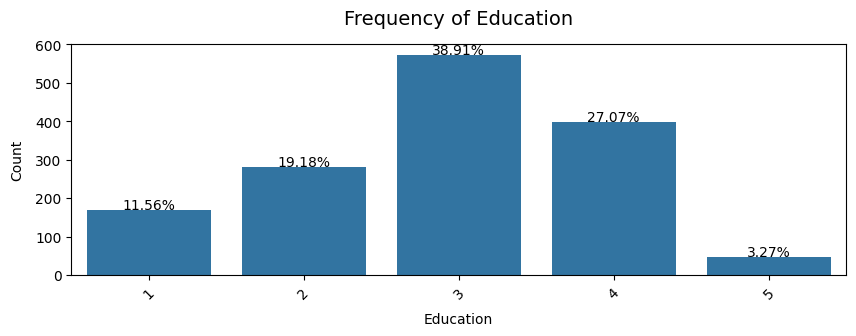

           proportion
Education            
3            0.389116
4            0.270748
2            0.191837
1            0.115646
5            0.032653
2. EnvironmentSatisfaction


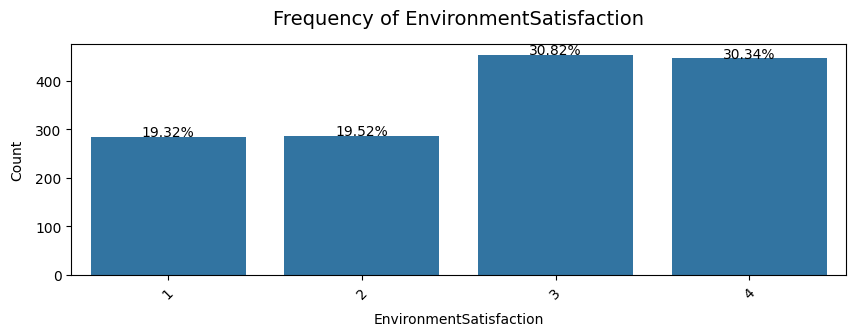

                         proportion
EnvironmentSatisfaction            
3                          0.308163
4                          0.303401
2                          0.195238
1                          0.193197
3. JobInvolvement


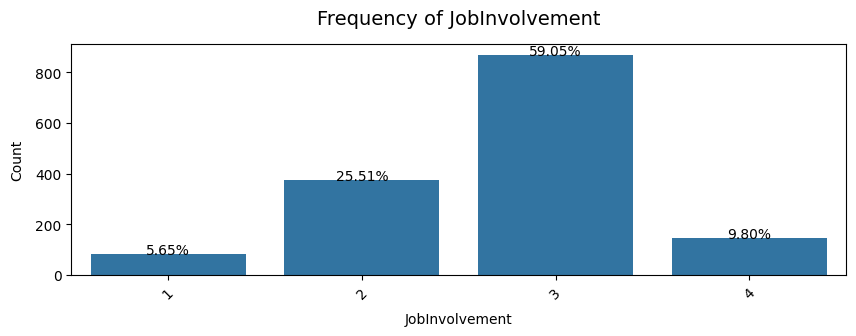

                proportion
JobInvolvement            
3                 0.590476
2                 0.255102
4                 0.097959
1                 0.056463
4. JobLevel


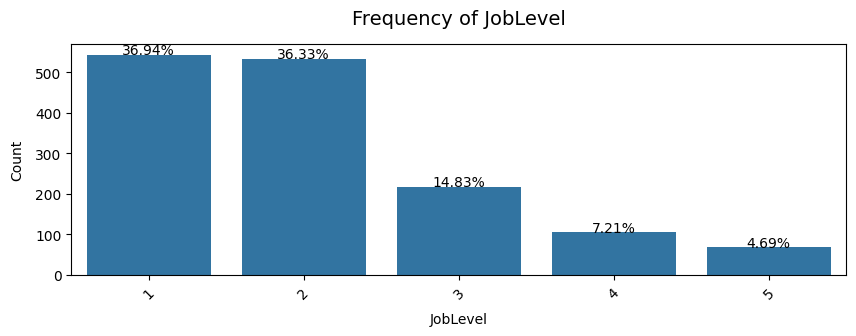

          proportion
JobLevel            
1           0.369388
2           0.363265
3           0.148299
4           0.072109
5           0.046939
5. JobSatisfaction


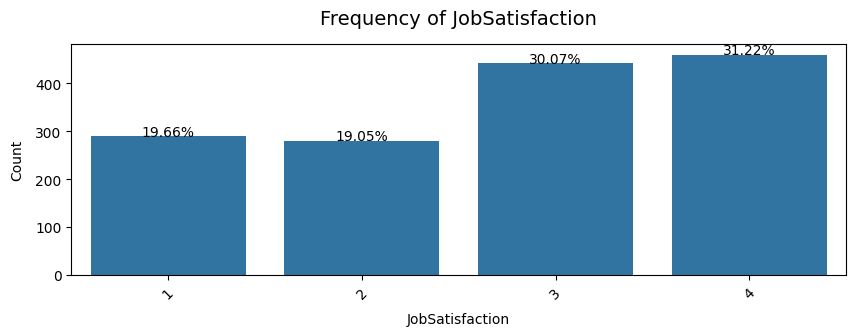

                 proportion
JobSatisfaction            
4                  0.312245
3                  0.300680
1                  0.196599
2                  0.190476
6. NumCompaniesWorked


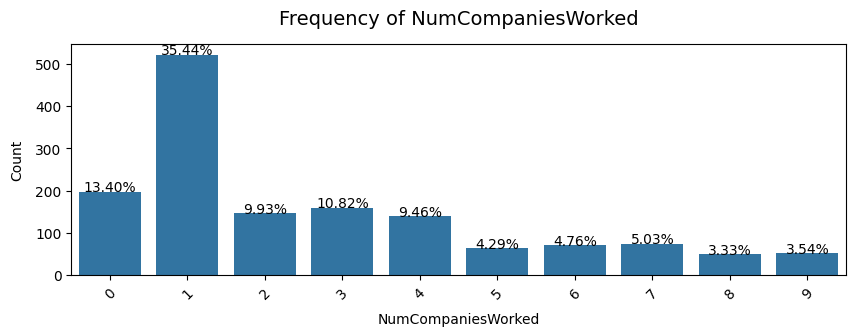

                    proportion
NumCompaniesWorked            
1                     0.354422
0                     0.134014
3                     0.108163
2                     0.099320
4                     0.094558
7                     0.050340
6                     0.047619
5                     0.042857
9                     0.035374
8                     0.033333
7. PerformanceRating


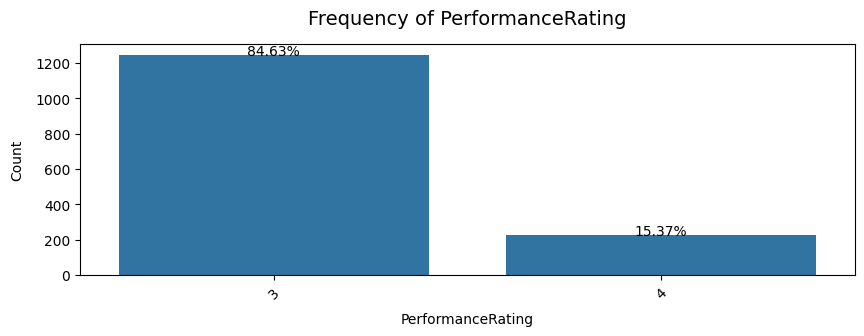

                   proportion
PerformanceRating            
3                    0.846259
4                    0.153741
8. RelationshipSatisfaction


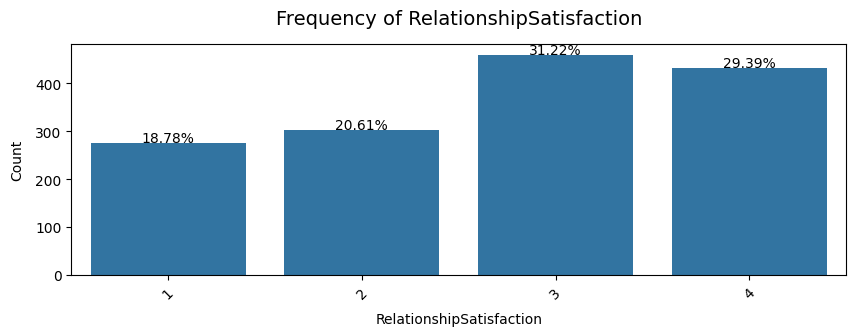

                          proportion
RelationshipSatisfaction            
3                           0.312245
4                           0.293878
2                           0.206122
1                           0.187755
9. StockOptionLevel


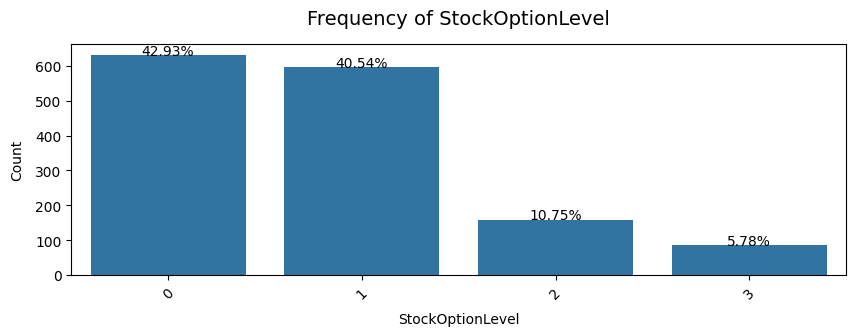

                  proportion
StockOptionLevel            
0                   0.429252
1                   0.405442
2                   0.107483
3                   0.057823
10. WorkLifeBalance


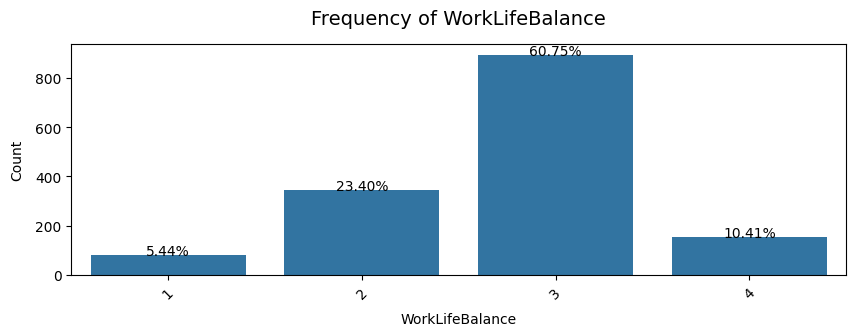

                 proportion
WorkLifeBalance            
3                  0.607483
2                  0.234014
4                  0.104082
1                  0.054422


In [26]:
def show_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        percentage = height / total_count * 100
        ax.text(p.get_x() + width / 2, height + 1, f'{percentage:.2f}%', ha="center")

for i, col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=col, data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel(col, size=10, labelpad=8)
    plt.ylabel('Count', size=10, labelpad=8)
    plt.xticks(rotation=45, size=10)
    plt.title(f"Frequency of {col}", size=14, y=1.05)

    plt.show()

    # Display value counts as a DataFrame
    print(df[col].value_counts(normalize=True).to_frame())

## Features(Numerical columns)

In [27]:
# Select the rest of the numerical columns
num_col = [col for col in num_col if col not in num_cat_col]
num_col

# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i}. {col}")

0. Age
1. DailyRate
2. DistanceFromHome
3. HourlyRate
4. MonthlyIncome
5. MonthlyRate
6. PercentSalaryHike
7. TotalWorkingYears
8. TrainingTimesLastYear
9. YearsAtCompany
10. YearsInCurrentRole
11. YearsSinceLastPromotion
12. YearsWithCurrManager


1. Age


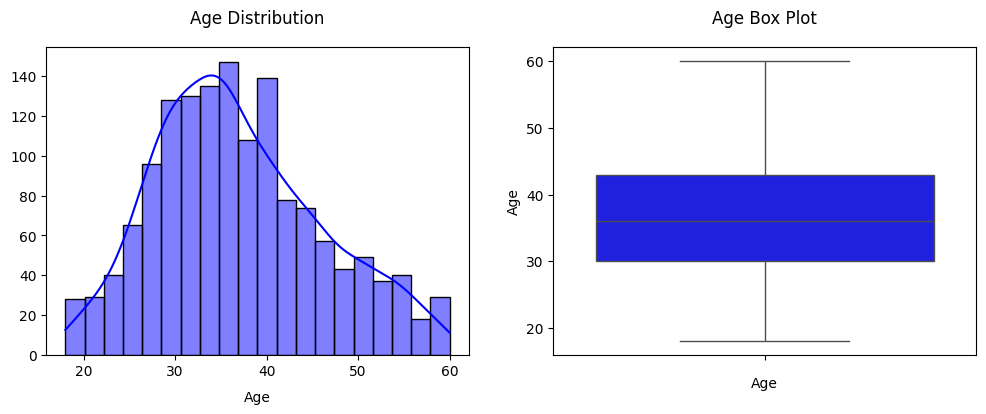

Skewness of Age: 0.4132863018563338
2. DailyRate


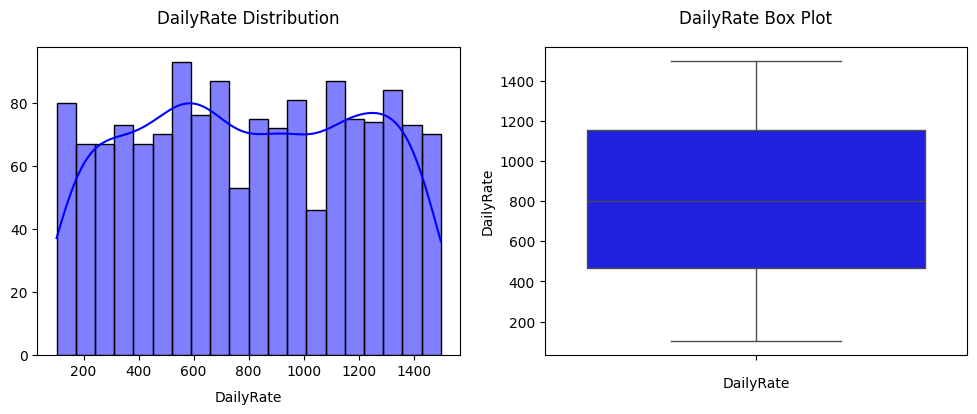

Skewness of DailyRate: -0.003518568352325854
3. DistanceFromHome


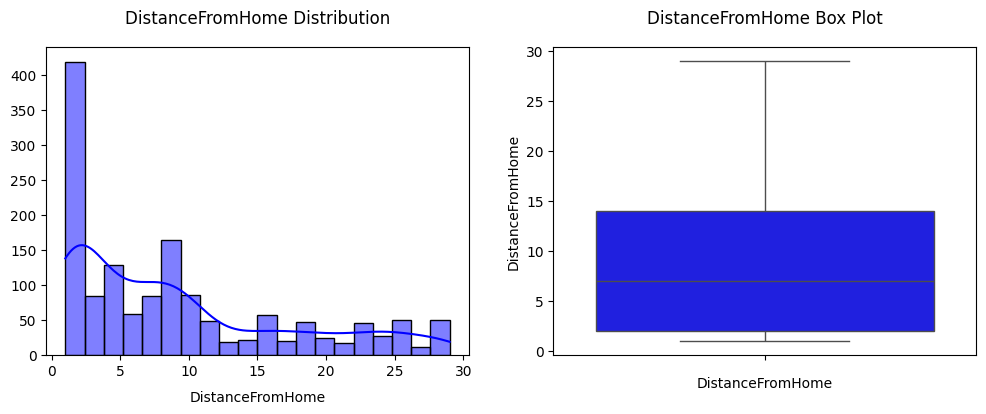

Skewness of DistanceFromHome: 0.9581179956568269
4. HourlyRate


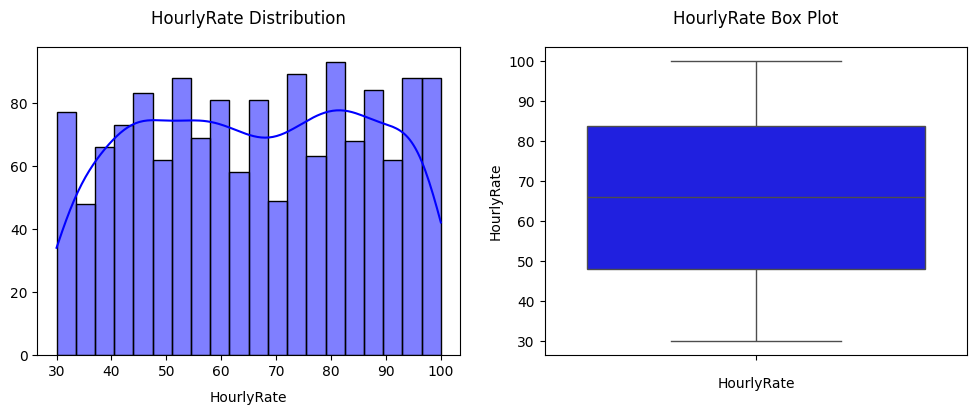

Skewness of HourlyRate: -0.03231095290044942
5. MonthlyIncome


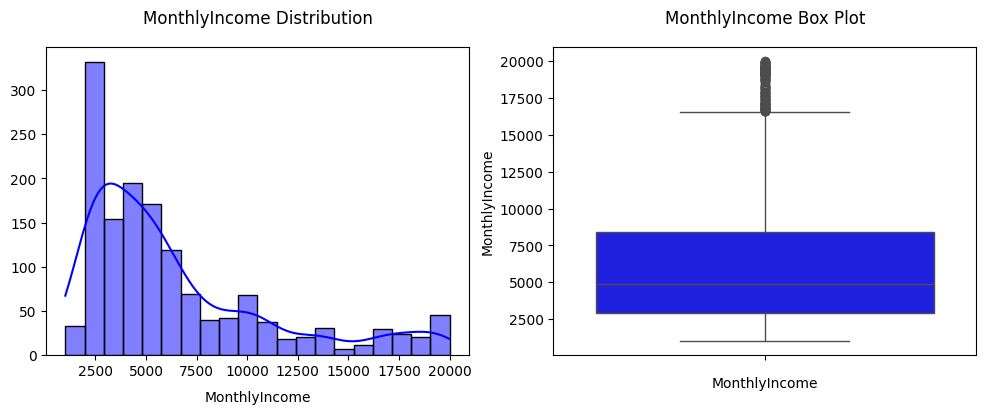

Skewness of MonthlyIncome: 1.3698166808390662
6. MonthlyRate


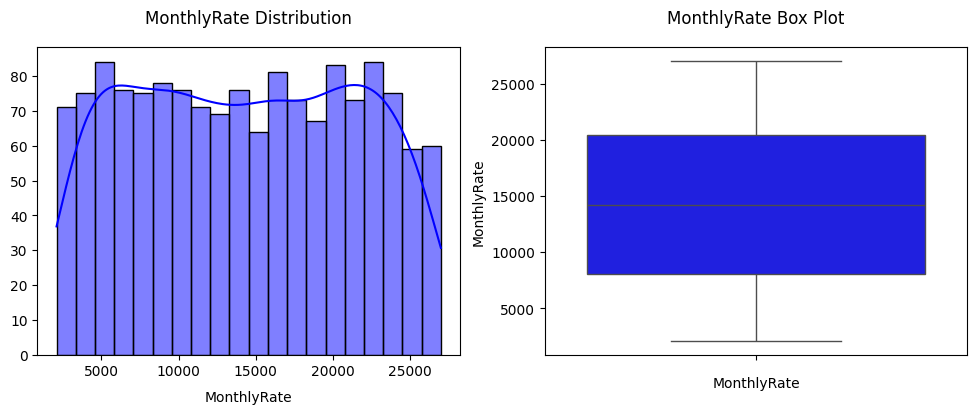

Skewness of MonthlyRate: 0.018577807891132458
7. PercentSalaryHike


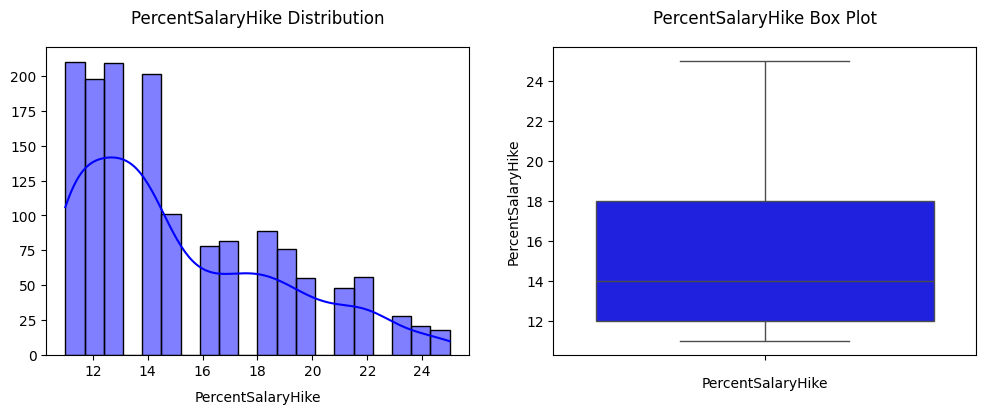

Skewness of PercentSalaryHike: 0.8211279755780908
8. TotalWorkingYears


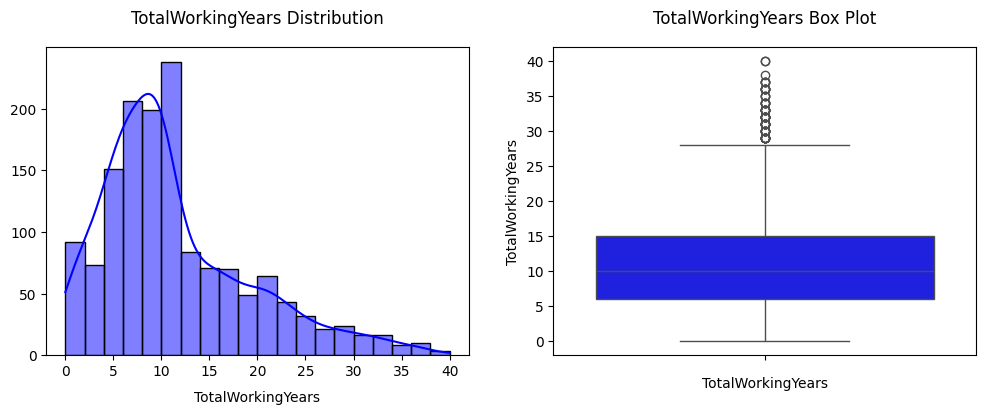

Skewness of TotalWorkingYears: 1.1171718528128527
9. TrainingTimesLastYear


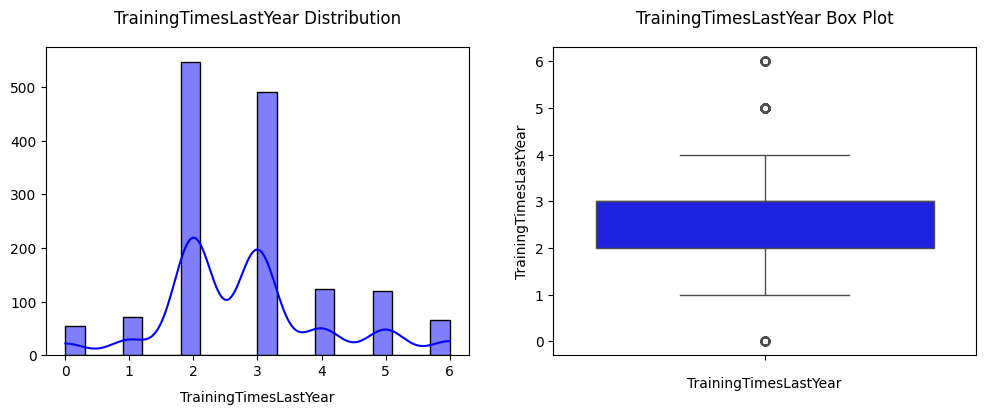

Skewness of TrainingTimesLastYear: 0.5531241710537028
10. YearsAtCompany


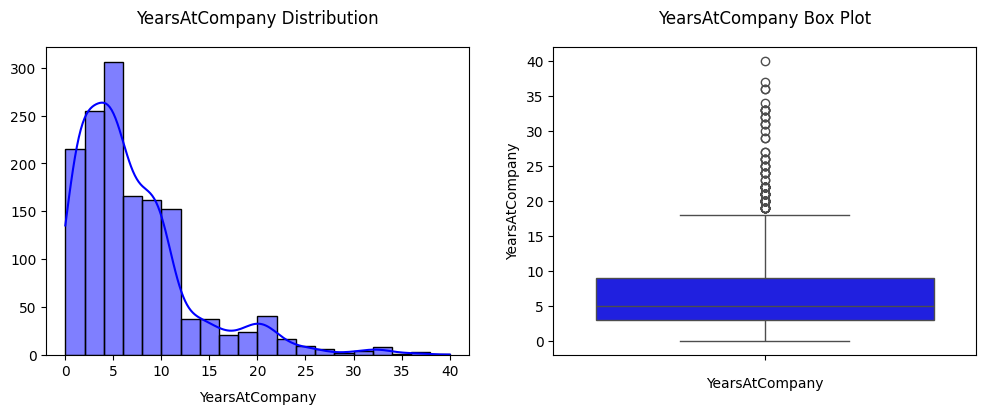

Skewness of YearsAtCompany: 1.7645294543422085
11. YearsInCurrentRole


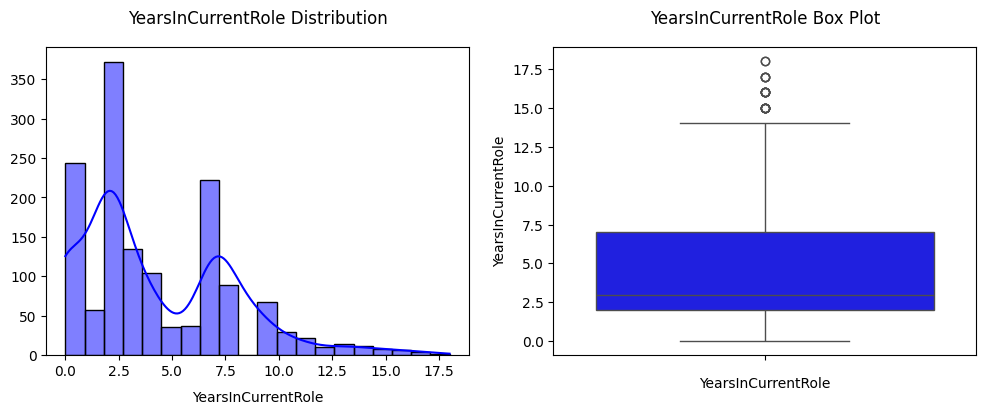

Skewness of YearsInCurrentRole: 0.9173631562908262
12. YearsSinceLastPromotion


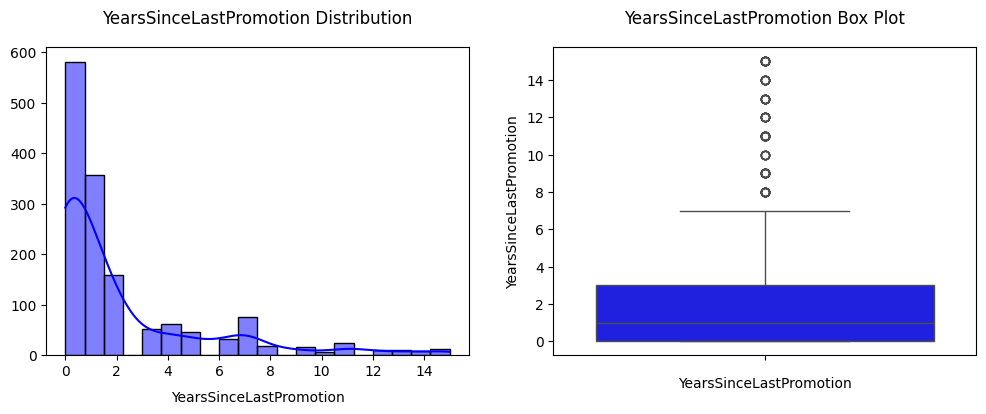

Skewness of YearsSinceLastPromotion: 1.9842899833524859
13. YearsWithCurrManager


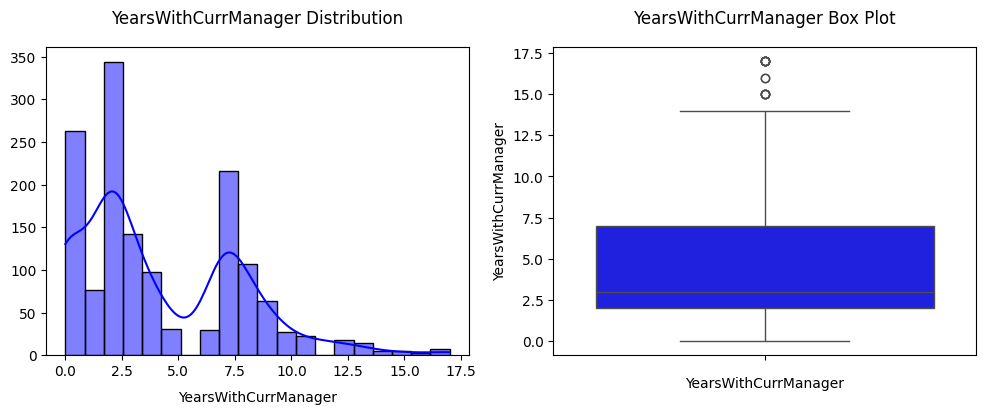

Skewness of YearsWithCurrManager: 0.8334509919918475


In [28]:
for i, col in enumerate(num_col):
    print(f"{i+1}. {col}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, bins=20, ax=axes[0], color='blue')
    sns.boxplot(df[col], ax=axes[1], color='blue')

    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)
    axes[0].set_xlabel(col, size=10, labelpad=8)

    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
    axes[1].set_xlabel(col, size=10, labelpad=8)

    plt.show()

    # Show the skewness of the column
    print(f"Skewness of {col}: {df[col].skew()}")

# Bivariate analysis

In [29]:
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

1. Age


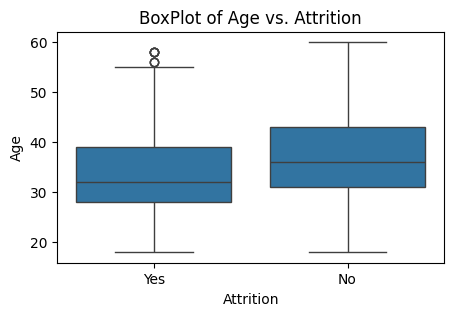

2. DailyRate


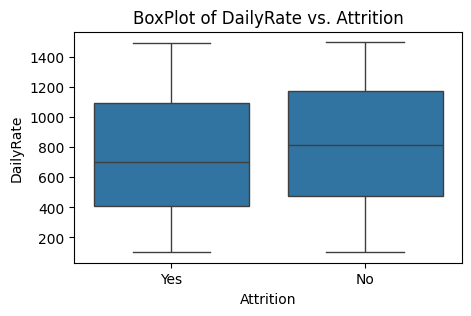

3. DistanceFromHome


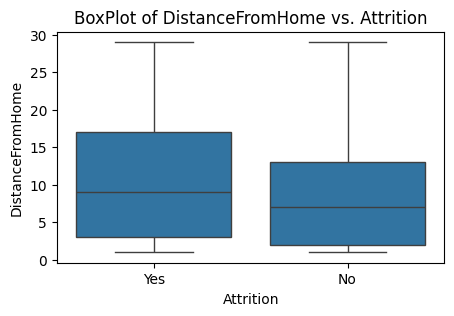

4. HourlyRate


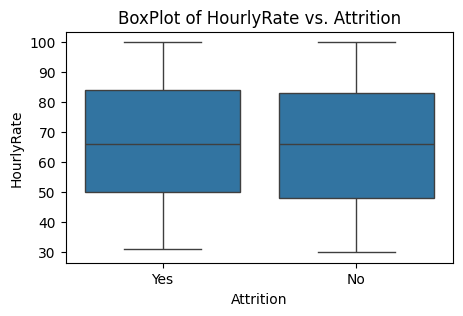

5. MonthlyIncome


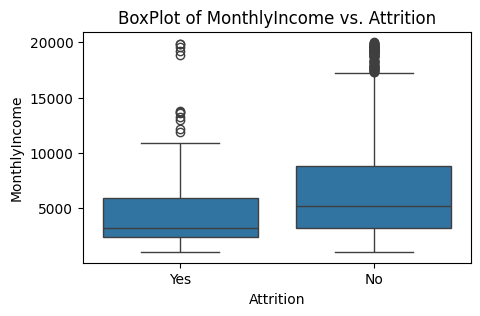

6. MonthlyRate


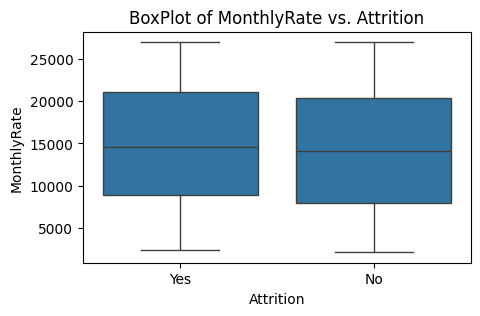

7. PercentSalaryHike


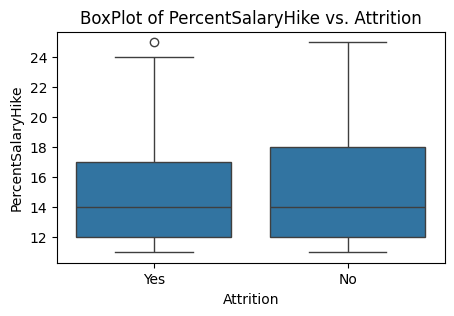

8. TotalWorkingYears


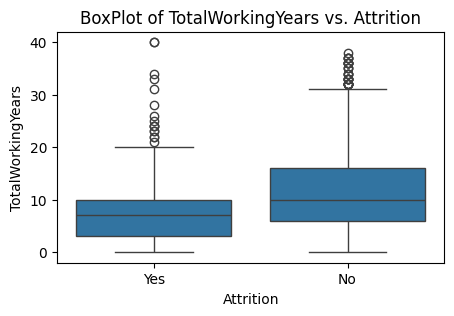

9. TrainingTimesLastYear


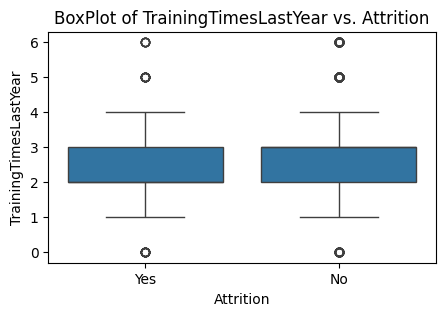

10. YearsAtCompany


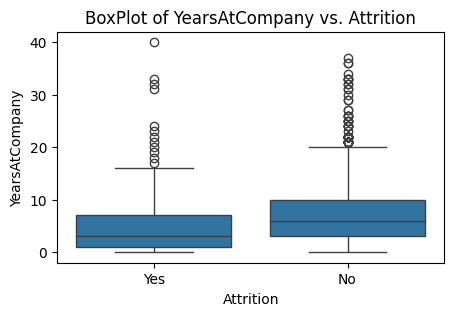

11. YearsInCurrentRole


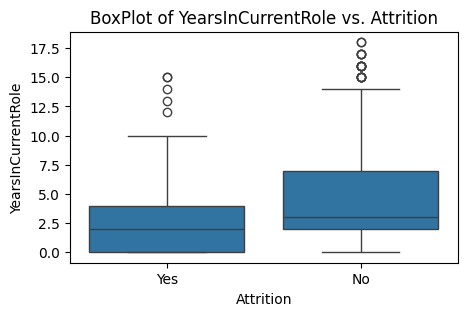

12. YearsSinceLastPromotion


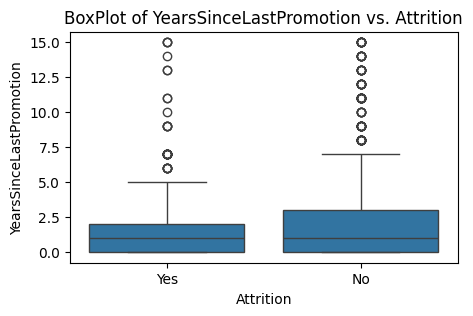

13. YearsWithCurrManager


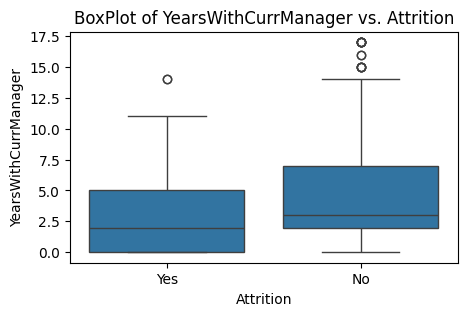

In [30]:
# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")
    # Visualizing and comparing each independent variable with Attrition
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df[[col,'Attrition']], y=col, x='Attrition')
    plt.title(f"BoxPlot of {col} vs. Attrition")
    
    plt.show()

1.BusinessTravel
2.Department
3.EducationField
4.Gender
5.JobRole
6.MaritalStatus
7.OverTime


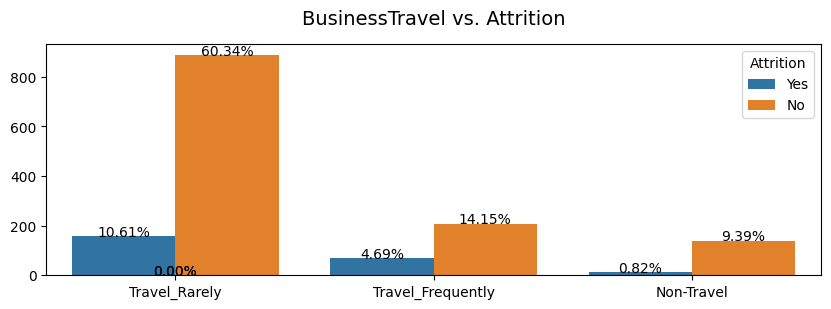

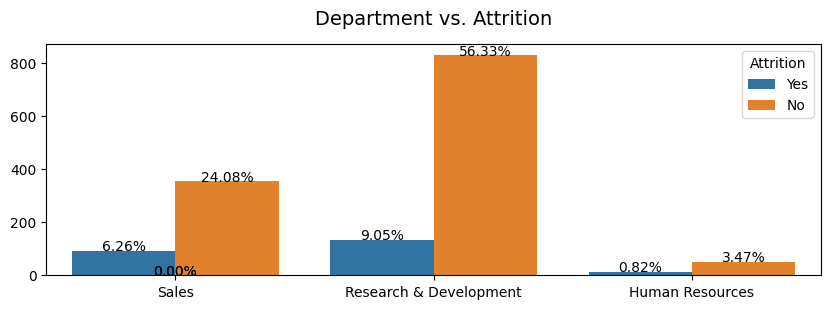

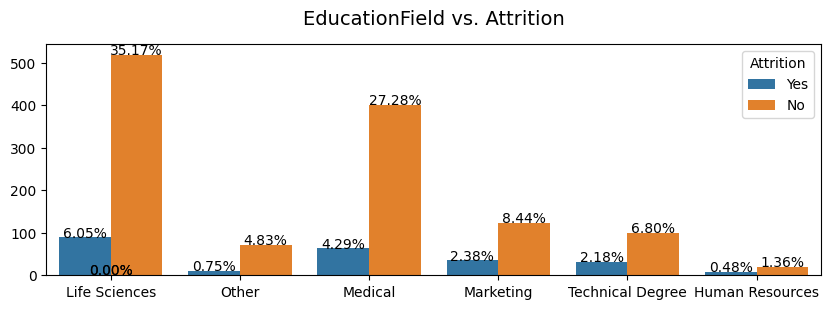

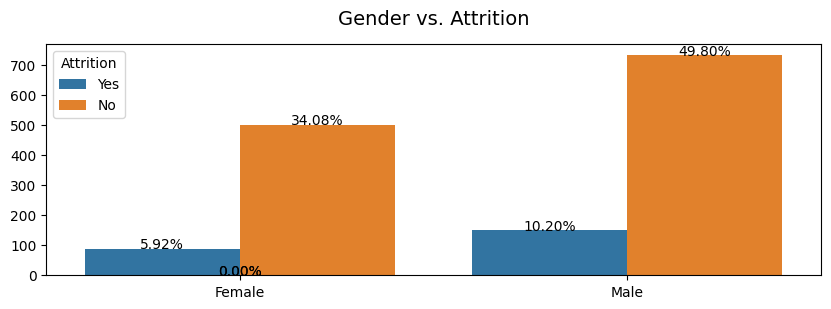

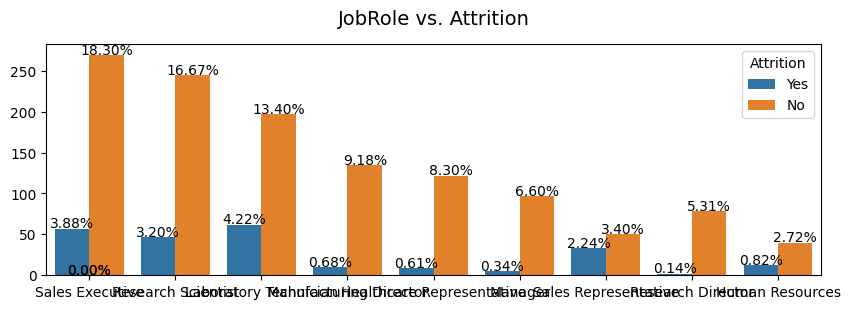

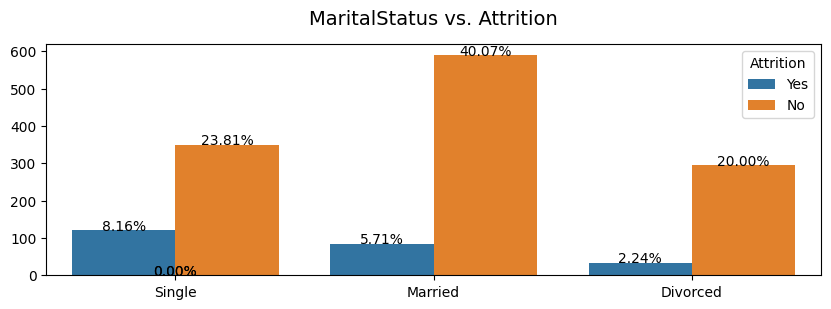

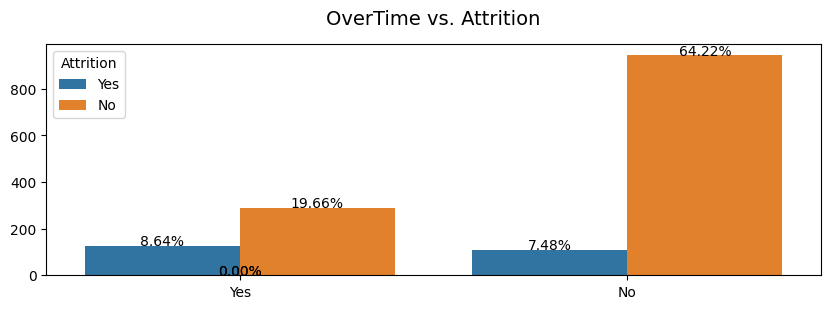

In [31]:

# List of categorical columns in the dataset
for i,col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}")
    # Compare BusinessTravel vs Attrition
    # col = 'BusinessTravel'
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=col, hue='Attrition', data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel('', size=10, labelpad=8)
    plt.ylabel('', size=10, labelpad=8)
    plt.title(f"{col} vs. Attrition", size=14, y=1.05);

1. Education
2. EnvironmentSatisfaction
3. JobInvolvement
4. JobLevel
5. JobSatisfaction
6. NumCompaniesWorked
7. PerformanceRating
8. RelationshipSatisfaction
9. StockOptionLevel
10. WorkLifeBalance


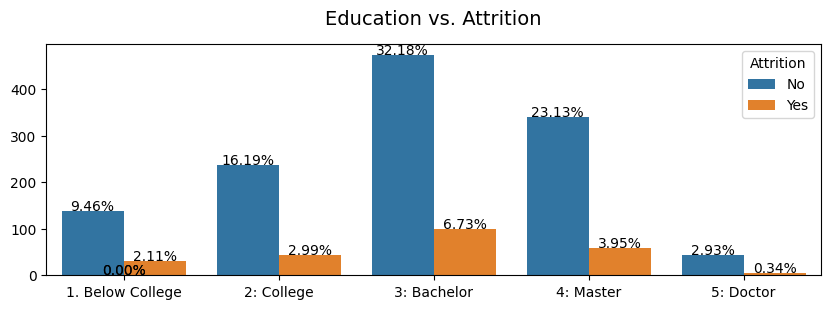

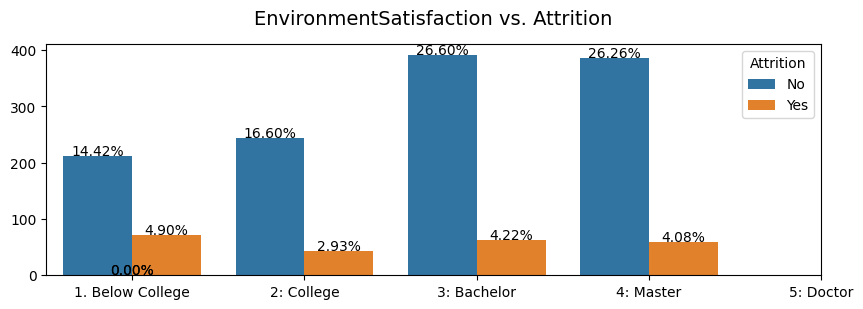

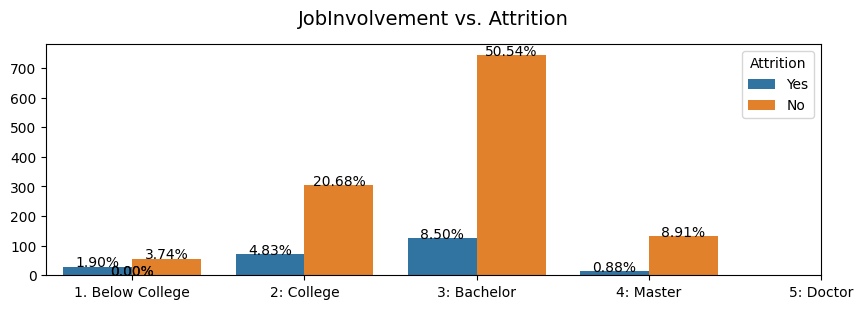

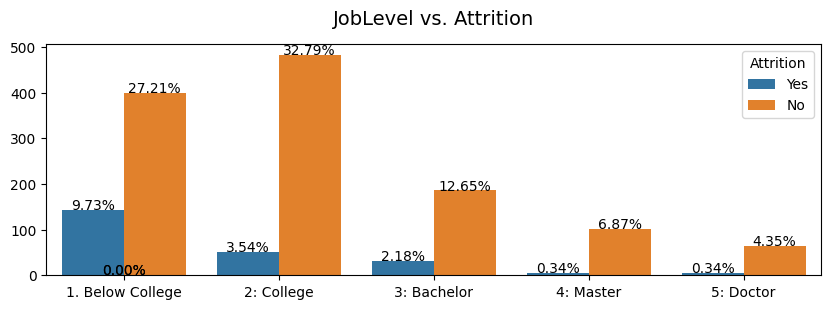

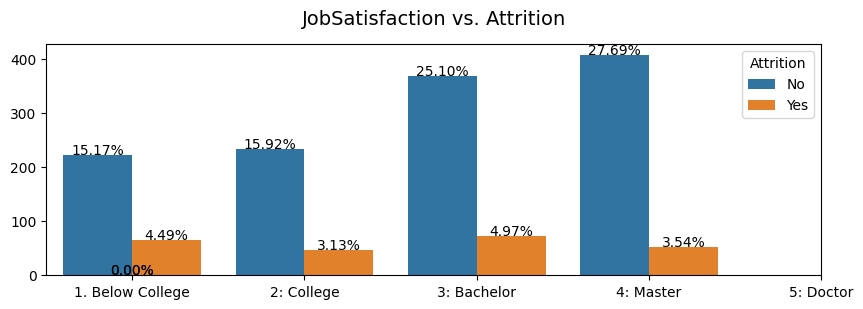

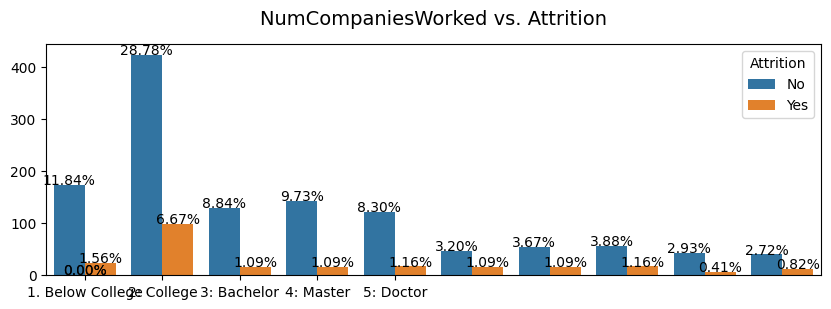

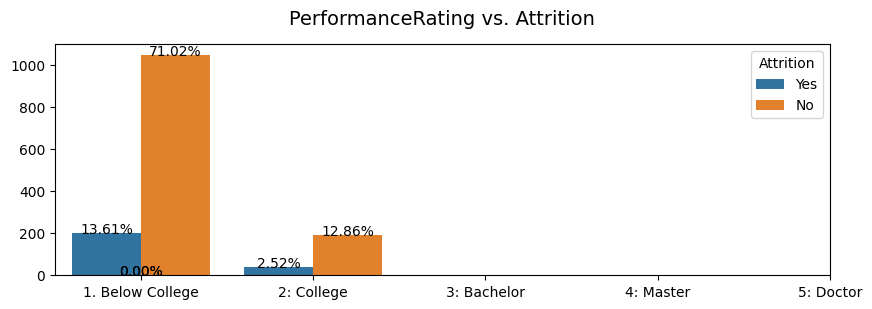

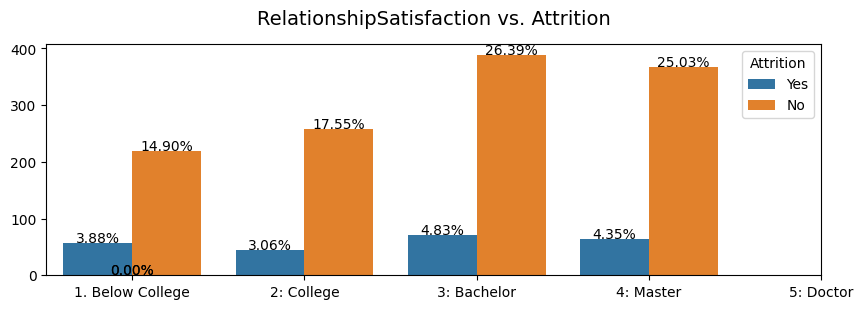

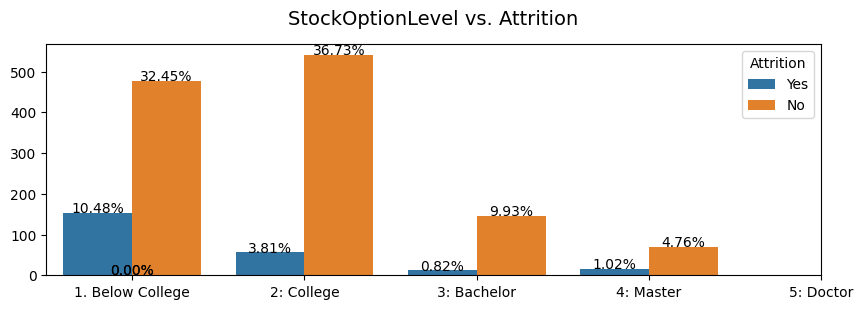

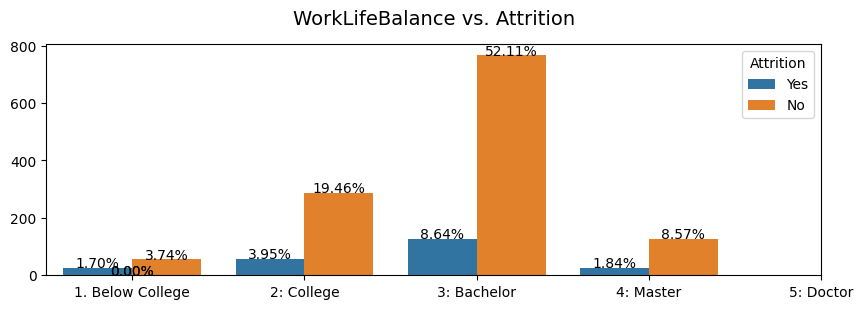

In [32]:
# List of numerical columns that look like categories
for i,col in enumerate(num_cat_col):
    print(f"{i+1}. {col}")

    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=col, hue='Attrition', data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel('', size=10, labelpad=8)
    plt.ylabel('', size=10, labelpad=8)
    plt.xticks((0, 1, 2, 3, 4), ['1. Below College', '2: College', '3: Bachelor', '4: Master', '5: Doctor'], size=10)

    plt.title(f"{col} vs. Attrition", size=14, y=1.05);

## Mulltivariate Anaalysis

### Pairplot

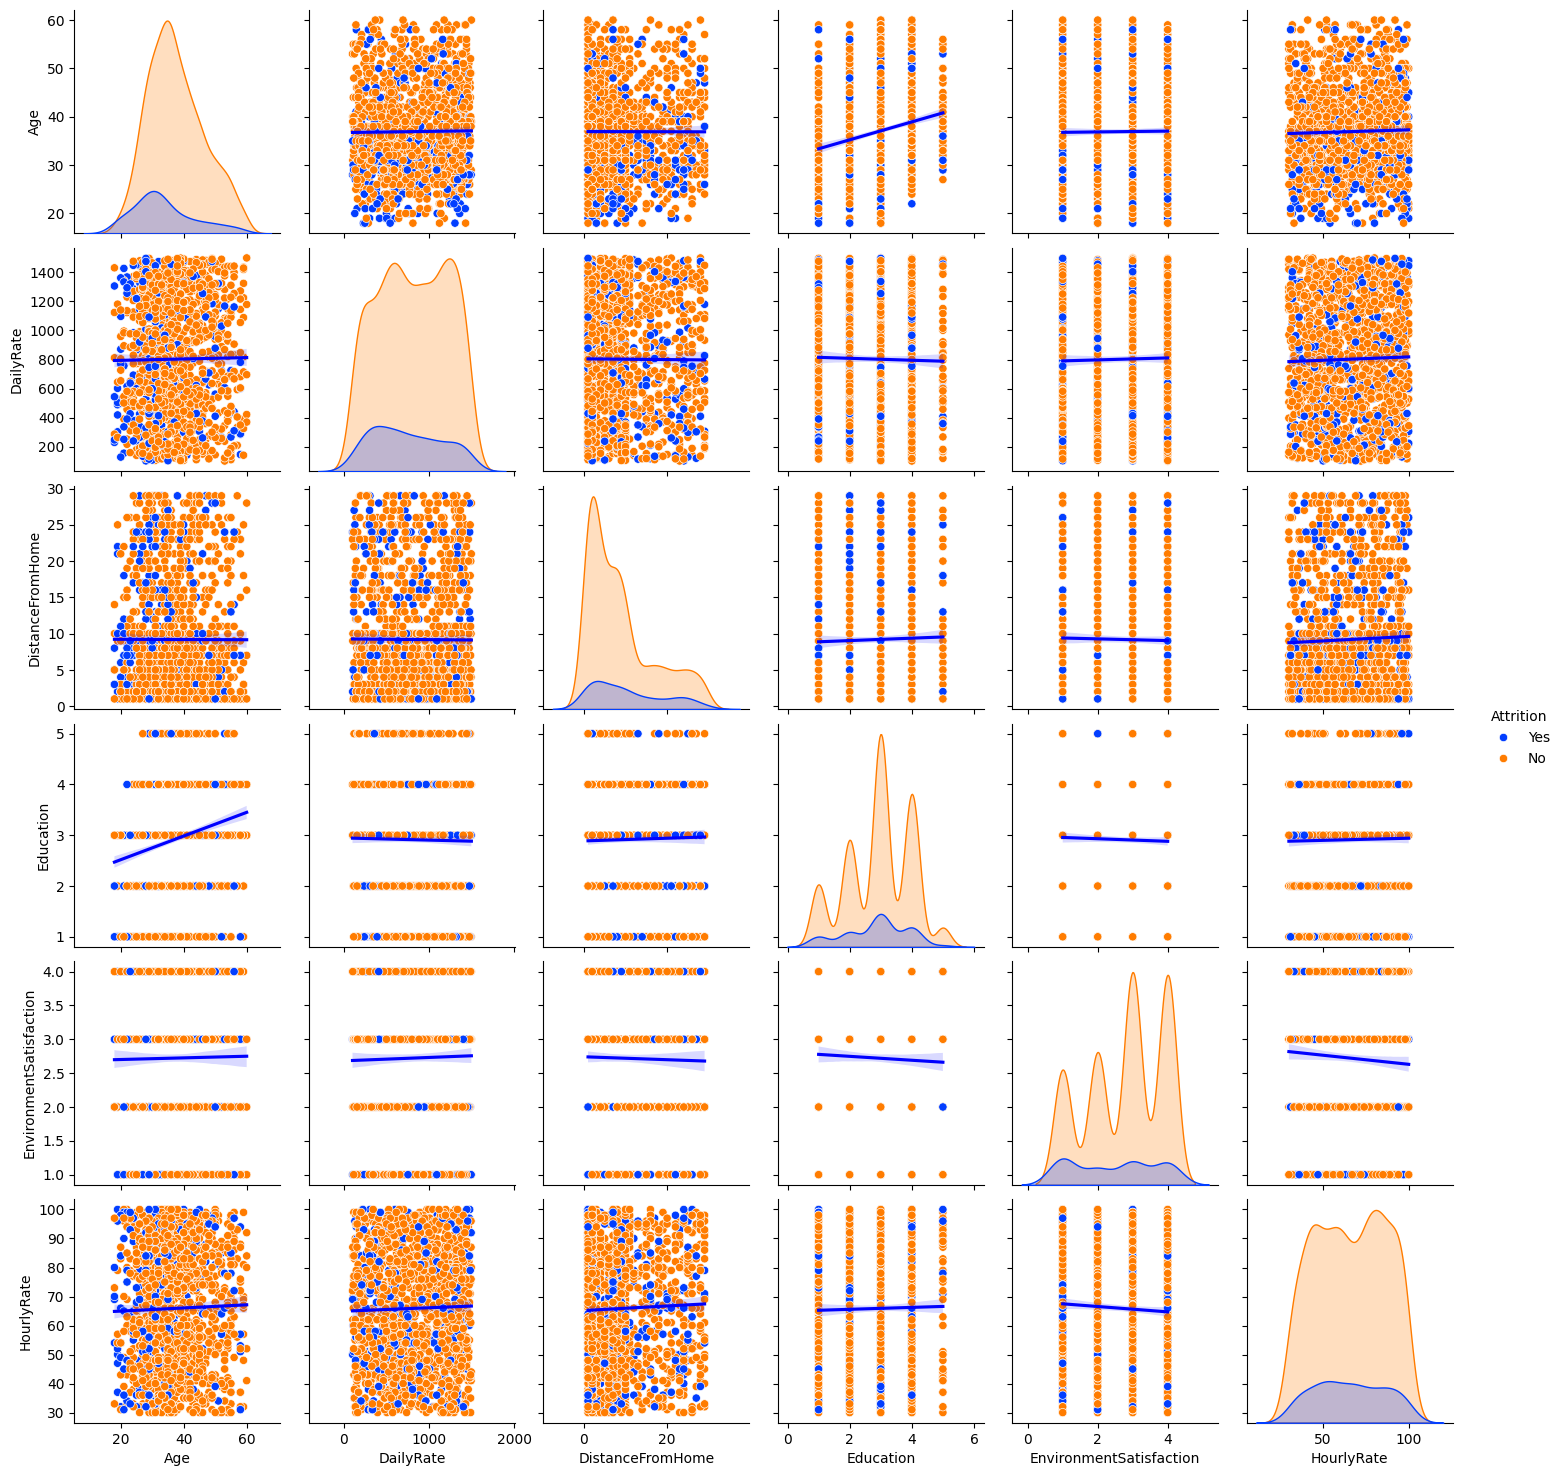

In [33]:
# First 10 columns
grid = sns.pairplot(df.iloc[:,:11], hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df.iloc[:,:11], x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

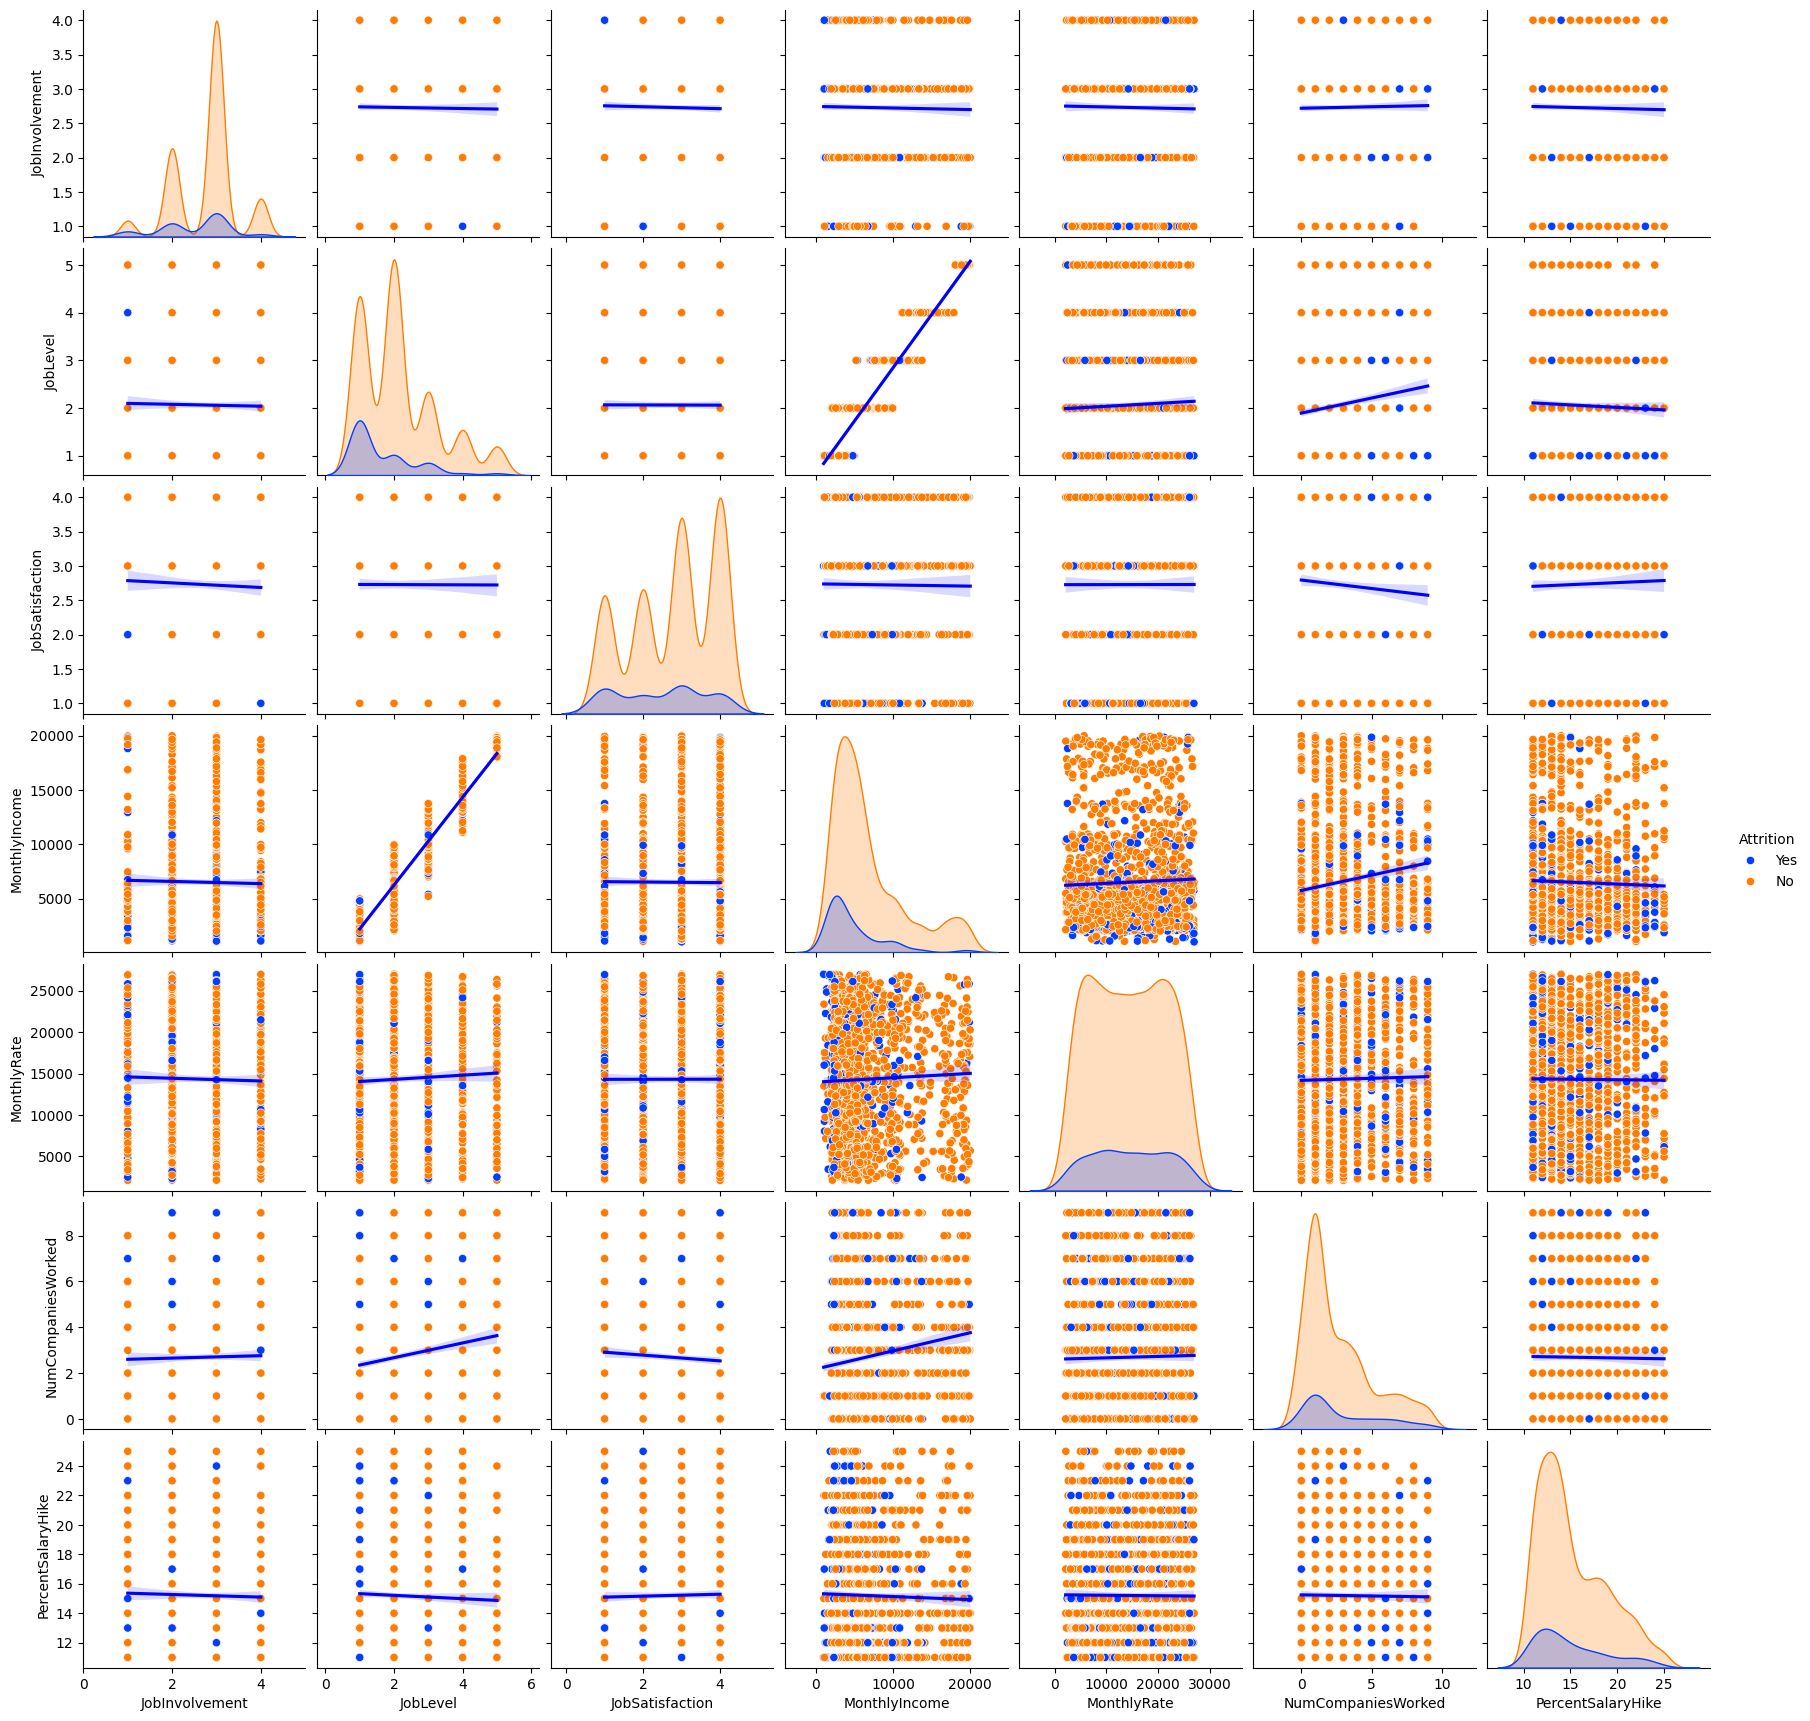

In [34]:
# Next 10 columns
df_pairplot = df.iloc[:,11:21]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

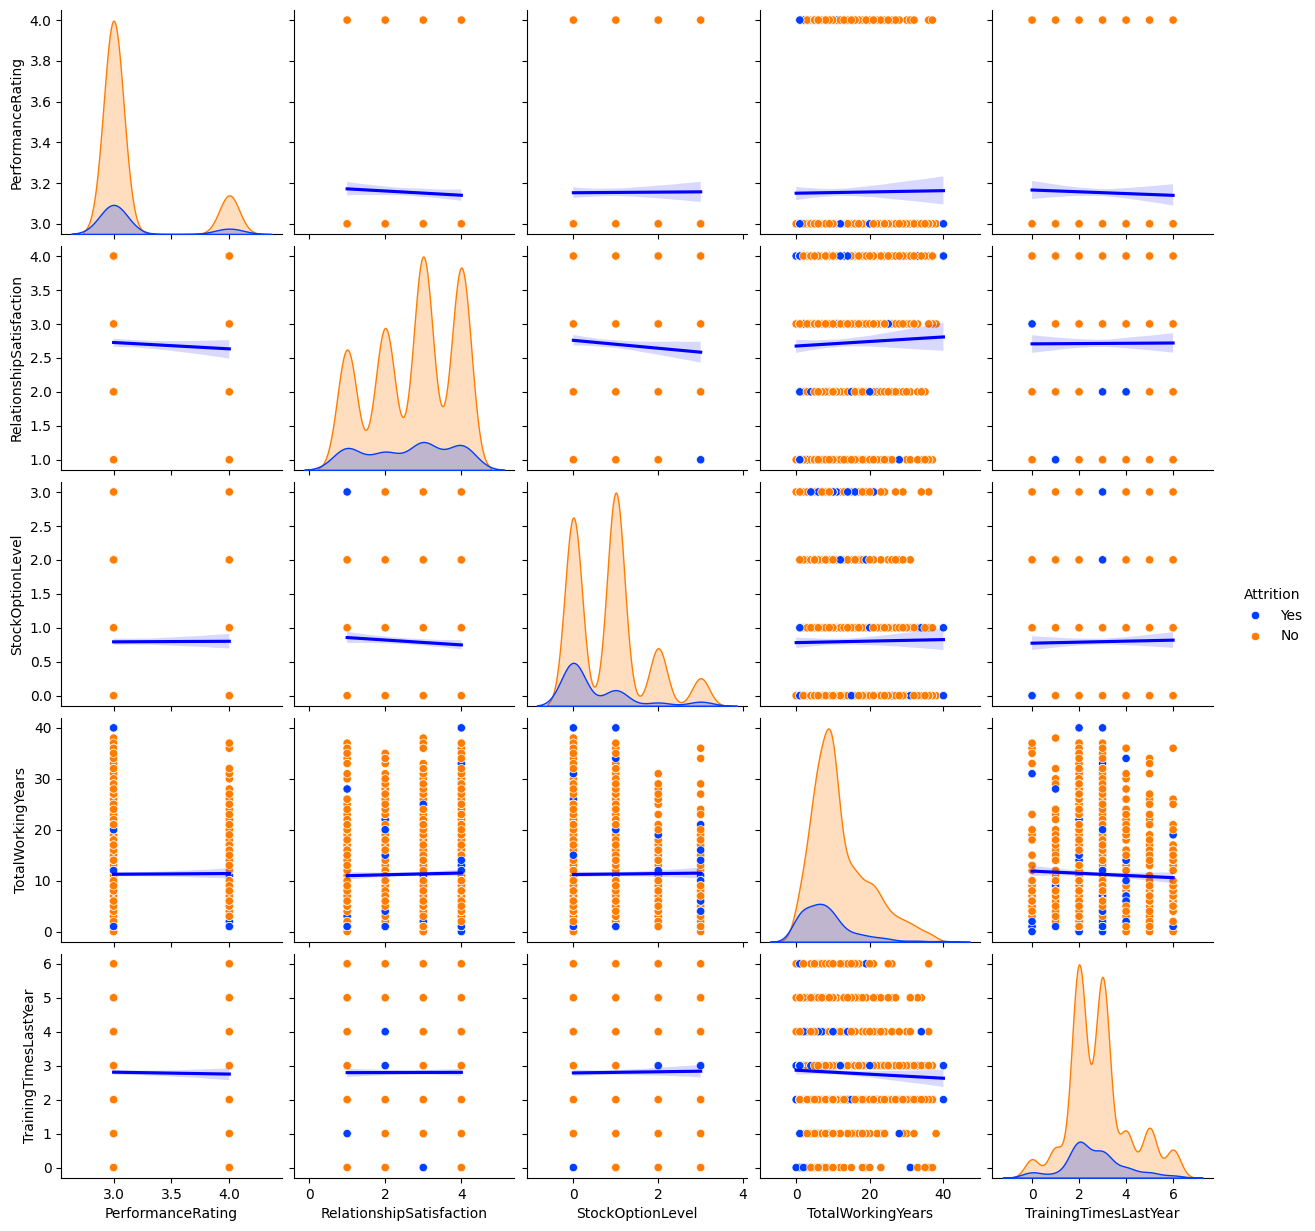

In [35]:
# Next 5 columns
df_pairplot = df.iloc[:,21:26]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

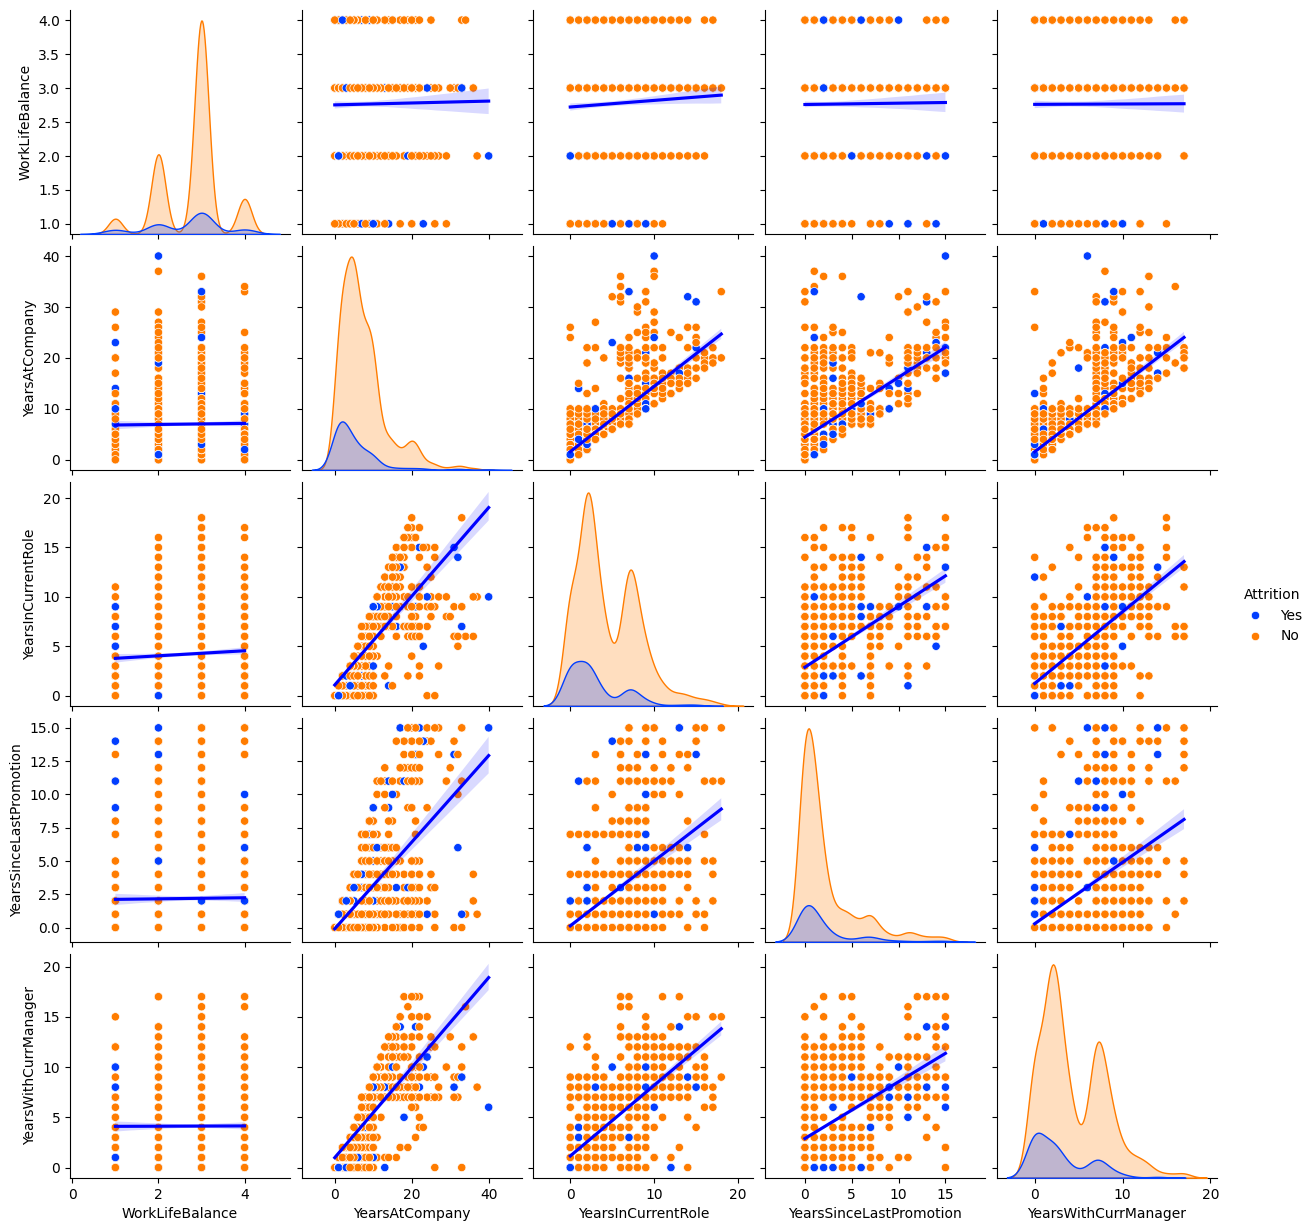

In [36]:
# Last columns
df_pairplot = df.iloc[:,26:]
df_pairplot['Attrition'] = df['Attrition']

grid = sns.pairplot(df_pairplot, hue = "Attrition", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df_pairplot, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

## Observation

Theres is a positive relationship between age and education, joblevel and monthly income, 

There is a positive correlation between YearsAtCompany, YearsInCurrentRole, YearsSinceLasPromotion and YearsCurrManager.

## Encoding the target variables

In [37]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

## Correlation

In [39]:
integer_df = df.select_dtypes(include=['int64'])

corr = integer_df.corr()
# Display the correlation matrix
corr

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

In [40]:
# Listing the correlation coeficients with the target variable 
corr_df = corr.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Attrition') ]

Feature A                 Feature B  Corr coef
12   Attrition                 Attrition   1.000000
101  Attrition          DistanceFromHome   0.077924
125  Attrition        NumCompaniesWorked   0.043494
221  Attrition               MonthlyRate   0.015170
296  Attrition         PerformanceRating   0.002889
377  Attrition                HourlyRate  -0.006846
406  Attrition         PercentSalaryHike  -0.013478
500  Attrition                 Education  -0.031373
507  Attrition   YearsSinceLastPromotion  -0.033019
531  Attrition  RelationshipSatisfaction  -0.045872
539  Attrition                 DailyRate  -0.056652
540  Attrition     TrainingTimesLastYear  -0.059478
543  Attrition           WorkLifeBalance  -0.063939
551  Attrition   EnvironmentSatisfaction  -0.103369
553  Attrition           JobSatisfaction  -0.103481
558  Attrition            JobInvolvement  -0.130016
561  Attrition            YearsAtCompany  -0.134392
563  Attrition          StockOptionLevel  -0.137145
565  Attrition      YearsWithCurrManager  -0.156199
566  Attrition                       Age  -0.159205
569  Attrition             MonthlyIncome  -0.159840
570  Attrition        YearsInCurrentRole  -0.160545
573  Attrition                  JobLevel  -0.169105
575  Attrition         TotalWorkingYears  -0.171063

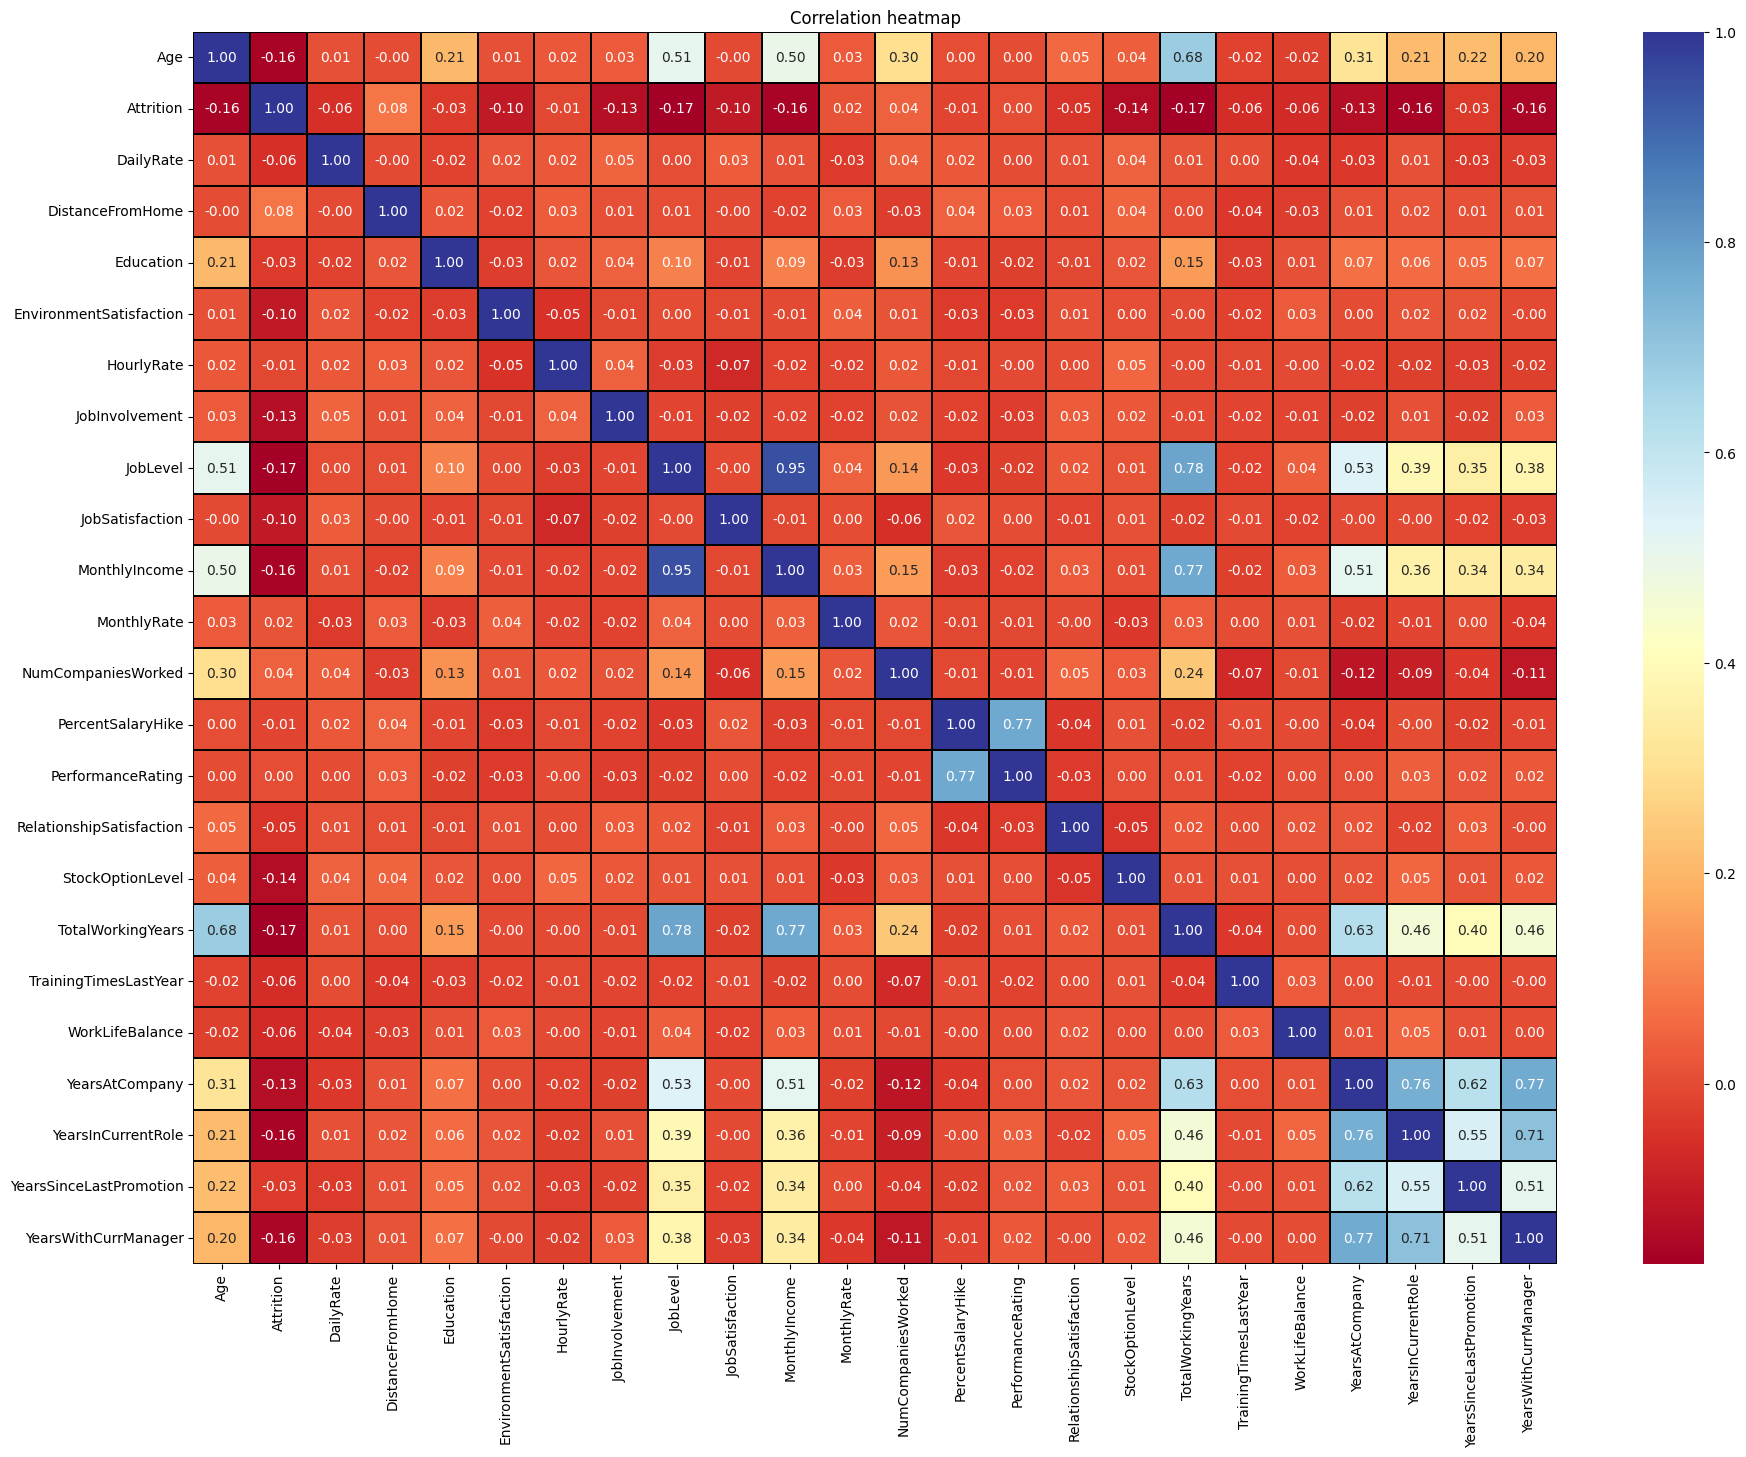

In [41]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(corr, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='RdYlBu', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation heatmap')
plt.show()

# Observvation:

• Target is more positively correlate with Distance from home

• Target is more negatively correlated with Totalworkingyears

• Joblevel is correlated with monthlyincome and totalworkingyears

• Age is positively correlatd with totalworkingyears

• The columns YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and TotalWorkingYears are correlated with each other.

# 2. Preprocessing Data

## Missing values

In [42]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Encoding categorical features

In [43]:
# Checking the unique values of the categorical independent variables
for i, col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.BusinessTravel:
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

2.Department:
 ['Sales' 'Research & Development' 'Human Resources']

3.EducationField:
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

4.Gender:
 ['Female' 'Male']

5.JobRole:
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

6.MaritalStatus:
 ['Single' 'Married' 'Divorced']

7.OverTime:
 ['Yes' 'No']



The columns wil be encodes manually as follows:

BusinessTravel : (1=Non-Travel, 2=Travel_Frequently, 3=Travel_Rarely)

Department : (1=Human Resources, 2=Research & Development', 3=Sales)

EducationField : (1=Human Resources, 2=Life Sciences, 3=Marketing, 4=Medical, 5=Other, 6=Technical Degree)

Gender : (1=Female, 2=Male)

JobRole : (1=Healthcare Representative, 2=Human Resources, 3=Laboratory Technician, 4=Manager, 5=Manufacturing Director, 6=Research Director, 7= Research Scientist, 8=Sales Executive, 9=Sales Representative)

MaritalStatus : (1=Divorced, 2=Married, 3=Single)

OverTime : (1=No, 2=Yes)

In [44]:
# Encoding the features  
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3})
df['Department'] = df['Department'].map({'Human Resources': 1, 'Research & Development': 2, 'Sales': 3})
df['EducationField'] = df['EducationField'].map({'Human Resources': 1, 
                                                  'Life Sciences': 2, 
                                                  'Marketing': 3,
                                                  'Medical': 4, 
                                                  'Other': 5, 
                                                  'Technical Degree': 6})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
df['JobRole'] = df['JobRole'].map({'Healthcare Representative': 1, 
                                    'Human Resources' : 2, 
                                    'Laboratory Technician' : 3, 
                                    'Manager' : 4, 
                                    'Manufacturing Director' : 5, 
                                    'Research Director' : 6, 
                                    'Research Scientist' : 7, 
                                    'Sales Executive' : 8, 
                                    'Sales Representative' : 9})
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced': 1, 'Married': 2, 'Single': 3})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

display(df.head())

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               3       1102           3                 1   
1   49          0               2        279           2                 8   
2   37          1               3       1373           2                 2   
3   33          0               2       1392           2                 3   
4   27          0               3        591           2                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               2                        2       1  ...   
1          1               2                        3       2  ...   
2          2               5                        4       2  ...   
3          4               2                        4       1  ...   
4          1               4                        1       2  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [45]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}:\n {df[col].unique()}\n")

1.BusinessTravel:
 [3 2 1]

2.Department:
 [3 2 1]

3.EducationField:
 [2 5 4 3 6 1]

4.Gender:
 [1 2]

5.JobRole:
 [8 7 3 5 1 4 9 6 2]

6.MaritalStatus:
 [3 2 1]

7.OverTime:
 [1 0]



## Removing outliers

Zscore

In [46]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             1.010909   0.891688        0.937414                 0.660531   
1             0.147150   1.868426        0.937414                 0.254625   
2             0.887515   0.891688        1.316673                 1.169781   
3             0.764121   1.061787        0.937414                 1.169781   
4             0.887515   1.868426        0.565311                 1.575686   
...                ...        ...             ...                      ...   
1465          1.703764   0.891688        0.565311                 0.254625   
1466          0.393938   1.868426        0.565311                 1.169781   
1467          0.640727   0.085049        0.937414                 0.660531   
1468          0.887515   0.085049        0.565311                 1.169781   
1469          0.147150   0.085049        0.565311                 0.660531   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     1.224745  ...           0.426230                  1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...           0.426230                  0.658973   
3     1.224745  ...           0.426230                  0.266233   
4     0.816497  ...           0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...           0.426230                  0.266233   
1466  0.816497  ...           0.426230                  1.584178   
1467  0.816497  ...           2.346151                  0.658973   
1468  0.816497  ...           0.426230                  1.191438   
1469  0.816497  ...           0.426230                  1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.932014           0.421642               2.171982   
1             0.241988           0.164511               0.155707   
2             0.932014           0.550208               0.155707   
3             0.932014           0.421642               0.155707   
4             0.241988           0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988           0.293077               1.707500   
1467          0.241988           0.678774               2.171982   
1468          0.932014           0.735447               0.155707   
1469          0.932014           0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            2.493820        0.164613            0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096        1.144294            1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096        0.817734            0.615492   
...               ...             ...                 ...   
1465         0.338096        0.327893            0.615492   
1466         0.338096        0.001333            0.764998   
1467         0.338096        0.164613            0.615492   
1468         

In [47]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

83 rows with outliers were deleted.
This represent 5.65% of the data.
In the new dataset there are 1387 rows and 31 columns.


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               3       1102           3                 1   
1      49          0               2        279           2                 8   
2      37          1               3       1373           2                 2   
3      33          0               2       1392           2                 3   
4      27          0               3        591           2                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               2        884           2                23   
1466   39          0               3        613           2                 6   
1467   27          0               3        155           2                 4   
1468   49          0               2       1023           3                 2   
1469   34          0               3        628           2                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               2                        2       1  ...   
1             1               2                        3       2  ...   
2             2               5                        4       2  ...   
3             4               2                        4       1  ...   
4             1               4                        1       2  ...   
...         ...             ...                      ...     ...  ...   
1465          2               4                        3       2  ...   
1466          1               4                        4       2  ...   
1467          3               2                        2       2  ...   
1468          3               4                        4       2  ...   
1469          3               4                        2       2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

## Skewness Correction

In [48]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
PerformanceRating         1.931566
Attrition                 1.805983
YearsSinceLastPromotion   1.756335
MonthlyIncome             1.544770
YearsAtCompany            1.248623
JobLevel                  1.126075
NumCompaniesWorked        1.037715
TotalWorkingYears         1.034487
StockOptionLevel          0.962332
DistanceFromHome          0.954752
OverTime                  0.954751
PercentSalaryHike         0.800592
YearsInCurrentRole        0.726675
YearsWithCurrManager      0.694506
TrainingTimesLastYear     0.577614
EducationField            0.544868
Age                       0.472280
Department                0.183919
MonthlyRate               0.030596
DailyRate                -0.017078
HourlyRate               -0.030481
MaritalStatus            -0.160952
Education                -0.289024
RelationshipSatisfaction -0.295686
EnvironmentSatisfaction  -0.325285
JobSatisfaction          -0.345612
JobRole                  -0.386843
Gender                   -0.417296
JobInvolvement           -0.501401
WorkLifeBalance          -0.557100
BusinessTravel           -1.426774

In [49]:
# Subsetting the features with a skew > 0.5
df_skew[(df_skew['Skew'] > 0.5) | (df_skew['Skew'] < -0.5)]

Skew
PerformanceRating        1.931566
Attrition                1.805983
YearsSinceLastPromotion  1.756335
MonthlyIncome            1.544770
YearsAtCompany           1.248623
JobLevel                 1.126075
NumCompaniesWorked       1.037715
TotalWorkingYears        1.034487
StockOptionLevel         0.962332
DistanceFromHome         0.954752
OverTime                 0.954751
PercentSalaryHike        0.800592
YearsInCurrentRole       0.726675
YearsWithCurrManager     0.694506
TrainingTimesLastYear    0.577614
EducationField           0.544868
JobInvolvement          -0.501401
WorkLifeBalance         -0.557100
BusinessTravel          -1.426774

#### we will remove skewness in the numerical column 'MonthlyIncome'

In [50]:
skew_columns = ['MonthlyIncome']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [51]:
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

Skewness
MonthlyIncome_sqrt  0.950248
MonthlyIncome_log   0.318593
MonthlyIncome_cbrt  0.742985
MonthlyIncome       1.544770

In [52]:
# Log transformation
df_process['MonthlyIncome'] = np.log(df_process['MonthlyIncome'])

df_process.skew().sort_values(ascending=False).to_frame("Skewness after transform")

Skewness after transform
PerformanceRating                         1.931566
Attrition                                 1.805983
YearsSinceLastPromotion                   1.756335
YearsAtCompany                            1.248623
JobLevel                                  1.126075
NumCompaniesWorked                        1.037715
TotalWorkingYears                         1.034487
StockOptionLevel                          0.962332
DistanceFromHome                          0.954752
OverTime                                  0.954751
PercentSalaryHike                         0.800592
YearsInCurrentRole                        0.726675
YearsWithCurrManager                      0.694506
TrainingTimesLastYear                     0.577614
EducationField                            0.544868
Age                                       0.472280
MonthlyIncome                             0.318593
Department                                0.183919
MonthlyRate                               0.030596
DailyRate                                -0.017078
HourlyRate                               -0.030481
MaritalStatus                            -0.160952
Education                                -0.289024
RelationshipSatisfaction                 -0.295686
EnvironmentSatisfaction                  -0.325285
JobSatisfaction                          -0.345612
JobRole                                  -0.386843
Gender                                   -0.417296
JobInvolvement                           -0.501401
WorkLifeBalance                          -0.557100
BusinessTravel                           -1.426774

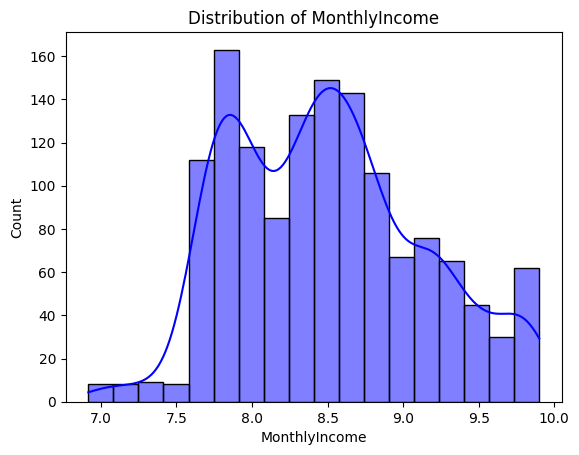

In [53]:
# Visualizing the distribution of the columns after removing skewness
column = 'MonthlyIncome'
sns.histplot(data=df_process, x=column, kde=True, color='blue')
plt.title(f"Distribution of {column}")

plt.show()

## Feature Scaling

### Separating features and label

In [59]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Attrition', axis=1)
y = df_process['Attrition']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (1387, 30)
Label Dimension = (1387,)


## Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.536681        0.593126   0.734325    1.405373         -1.011249   
1  1.442111       -0.905354  -1.307769   -0.496337         -0.145521   
2  0.083966        0.593126   1.406752   -0.496337         -0.887573   
3 -0.368749       -0.905354   1.453896   -0.496337         -0.763898   
4 -1.047821        0.593126  -0.533609   -0.496337         -0.887573   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.876177       -0.940815                -0.665328 -1.229911    1.388670   
1  -1.853858       -0.940815                 0.251978  0.813067   -0.239091   
2  -0.876177        1.305159                 1.169285  0.813067    1.290017   
3   1.079185       -0.940815                 1.169285 -1.229911   -0.485721   
4  -1.853858        0.556501                -1.582635  0.813067   -1.274939   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.424765                 -1.575817         -0.929427   
1  ...           2.354241                  1.199034          0.238250   
2  ...          -0.424765                 -0.650866         -0.929427   
3  ...          -0.424765                  0.274084         -0.929427   
4  ...          -0.424765                  1.199034          0.238250   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.343728              -2.171420        -2.501172       -0.022350   
1          -0.045106               0.151871         0.336558        0.832812   
2          -0.493039               0.151871         0.336558       -1.305094   
3          -0.343728               0.151871         0.336558        0.405231   
4          -0.642351               0.151871         0.336558       -0.877513   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.040903                -0.710699              0.368270  
1            0.965895                -0.310480              0.982200  
2           -1.192419                -0.710699             -1.166556  
3            0.965895                 0.489958             -1.166556  
4           -0.575758                 0.089739             -0.552626  

[5 rows x 30 columns]

# Muticollinearity Analysis and Feature Selection

## Variance Inflation Factor (VIF)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
11                  JobLevel    7.065573
15             MonthlyIncome    6.268099
26            YearsAtCompany    4.887712
23         TotalWorkingYears    3.810616
29      YearsWithCurrManager    3.312577
27        YearsInCurrentRole    3.022929
19         PercentSalaryHike    2.482907
20         PerformanceRating    2.478154
3                 Department    2.044466
12                   JobRole    1.974373
0                        Age    1.849104
14             MaritalStatus    1.839781
22          StockOptionLevel    1.821346
28   YearsSinceLastPromotion    1.436179
17        NumCompaniesWorked    1.272310
5                  Education    1.063194
18                  OverTime    1.028906
2                  DailyRate    1.028834
24     TrainingTimesLastYear    1.028070
7    EnvironmentSatisfaction    1.024684
8                     Gender    1.023577
13           JobSatisfaction    1.022557
6             EducationField    1.021451
9                 HourlyRate    1.021404
21  RelationshipSatisfaction    1.020553
10            JobInvolvement    1.018533
16               MonthlyRate    1.017855
25           WorkLifeBalance    1.017618
4           DistanceFromHome    1.015083
1             BusinessTravel    1.014129

#### Here we can see there is no multicollinearity problem since no values are greater than 10

# Balancing the dataset

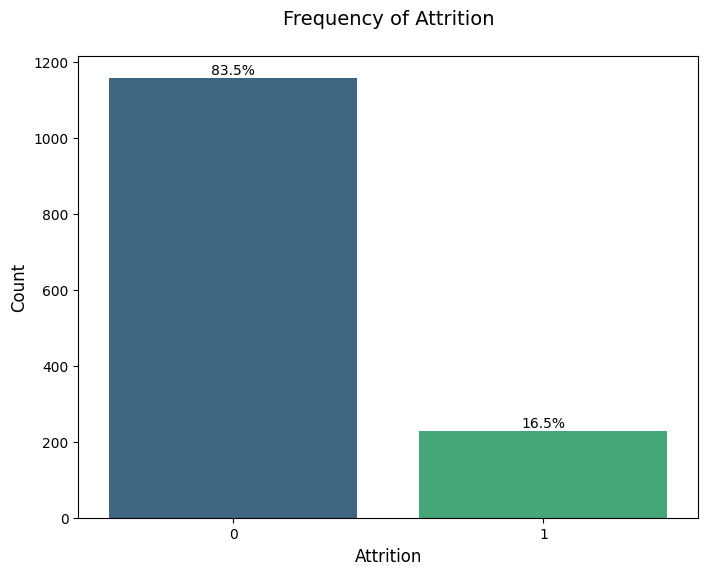

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequencies of target
target_counts = y.value_counts()
total = len(y)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')

# Annotate percentages on the bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Frequency of Attrition", size=14, y=1.05)
plt.xlabel('Attrition', size=12)
plt.ylabel('Count', size=12)
plt.show()


In [60]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

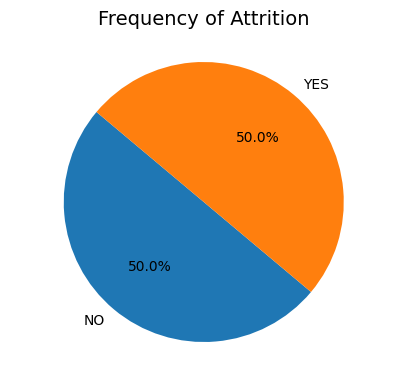

In [61]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Attrition", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Now dataset is balanced

In [62]:
X = x1
Y = y1

# 3. Modeling

### Finding the best random state

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def get_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [124]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = get_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9295 at random_state 160
CPU times: total: 1min 5s
Wall time: 1min 30s


## Creating train test split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (1621, 30)
x_test shape:   (695, 30)
y_train shape:  (1621,)
y_test shape:   (695,)


## Classification Algorithms

In [126]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [127]:
# Functions 
def calc_accuracy(model, id_model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [128]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}
    

## RandomForestClassifier

In [129]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[321  26]
 [ 27 321]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       347
           1       0.93      0.92      0.92       348

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 92.37%
CPU times: total: 266 ms
Wall time: 549 ms


## Logistic Regression

In [130]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: LogisticRegression
Confusion matrix: 
 [[215 132]
 [ 94 254]]
Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.62      0.66       347
           1       0.66      0.73      0.69       348

    accuracy                           0.67       695
   macro avg       0.68      0.67      0.67       695
weighted avg       0.68      0.67      0.67       695

Training Accuracy using LogisticRegression is 66.01%
The accuracy score using LogisticRegression is 67.48%
CPU times: total: 46.9 ms
Wall time: 54.1 ms


## Extra Trees Classifier

In [131]:

%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: ExtraTreesClassifier
Confusion matrix: 
 [[327  20]
 [ 30 318]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       347
           1       0.94      0.91      0.93       348

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 92.81%
CPU times: total: 328 ms
Wall time: 360 ms


## Support Vector Machine Classifier

In [132]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: SVC
Confusion matrix: 
 [[108 239]
 [ 91 257]]
Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.31      0.40       347
           1       0.52      0.74      0.61       348

    accuracy                           0.53       695
   macro avg       0.53      0.52      0.50       695
weighted avg       0.53      0.53      0.50       695

Training Accuracy using SVC is 52.75%
The accuracy score using SVC is 52.52%
CPU times: total: 219 ms
Wall time: 425 ms


## Gradient Boosting Classifier

In [133]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: GradientBoostingClassifier
Confusion matrix: 
 [[307  40]
 [ 33 315]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       347
           1       0.89      0.91      0.90       348

    accuracy                           0.89       695
   macro avg       0.90      0.89      0.89       695
weighted avg       0.90      0.89      0.89       695

Training Accuracy using GradientBoostingClassifier is 95.62%
The accuracy score using GradientBoostingClassifier is 89.5%
CPU times: total: 328 ms
Wall time: 531 ms


## AdaBoost Classifier

In [134]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: AdaBoostClassifier
Confusion matrix: 
 [[300  47]
 [ 32 316]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       347
           1       0.87      0.91      0.89       348

    accuracy                           0.89       695
   macro avg       0.89      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695

Training Accuracy using AdaBoostClassifier is 88.65%
The accuracy score using AdaBoostClassifier is 88.63%
CPU times: total: 219 ms
Wall time: 245 ms


## Bagging Classifier

In [135]:

%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred



Model: BaggingClassifier
Confusion matrix: 
 [[316  31]
 [ 53 295]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       347
           1       0.90      0.85      0.88       348

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695

Training Accuracy using BaggingClassifier is 99.20%
The accuracy score using BaggingClassifier is 87.91%
CPU times: total: 203 ms
Wall time: 227 ms


## Comapring models

In [136]:

df_model = df_model.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model)

id  \
2        ExtraTreesClassifier   
0      RandomForestClassifier   
4  GradientBoostingClassifier   
5          AdaBoostClassifier   
6           BaggingClassifier   
1          LogisticRegression   
3                         SVC   

                                               Model  Training Accuracy  \
2  (ExtraTreeClassifier(random_state=245580177), ...           1.000000   
0  (DecisionTreeClassifier(max_features='sqrt', r...           1.000000   
4  ([DecisionTreeRegressor(criterion='friedman_ms...           0.956200   
5  (DecisionTreeClassifier(max_depth=1, random_st...           0.886490   
6  (DecisionTreeClassifier(random_state=131069753...           0.991980   
1                               LogisticRegression()           0.660086   
3                                              SVC()           0.527452   

   Model Accuracy Score  
2              0.928058  
0              0.923741  
4              0.894964  
5              0.886331  
6              0.879137  
1              0.674820  
3              0.525180

# Cross validation score

In [137]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [138]:
# Define the new columns for CV metrics
df_model['CV score mean'] = np.NaN
df_model['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model.set_index("id", inplace=True)

In [139]:
df_model

Model  \
id                                                                              
ExtraTreesClassifier        (ExtraTreeClassifier(random_state=245580177), ...   
RandomForestClassifier      (DecisionTreeClassifier(max_features='sqrt', r...   
GradientBoostingClassifier  ([DecisionTreeRegressor(criterion='friedman_ms...   
AdaBoostClassifier          (DecisionTreeClassifier(max_depth=1, random_st...   
BaggingClassifier           (DecisionTreeClassifier(random_state=131069753...   
LogisticRegression                                       LogisticRegression()   
SVC                                                                     SVC()   

                            Training Accuracy  Model Accuracy Score  \
id                                                                    
ExtraTreesClassifier                 1.000000              0.928058   
RandomForestClassifier               1.000000              0.923741   
GradientBoostingClassifier           0.956200              0.894964   
AdaBoostClassifier                   0.886490              0.886331   
BaggingClassifier                    0.991980              0.879137   
LogisticRegression                   0.660086              0.674820   
SVC                                  0.527452              0.525180   

                            CV score mean  Diff Acc and cv score  
id                                                                
ExtraTreesClassifier                  NaN                    NaN  
RandomForestClassifier                NaN                    NaN  
GradientBoostingClassifier            NaN                    NaN  
AdaBoostClassifier                    NaN                    NaN  
BaggingClassifier                     NaN                    NaN  
LogisticRegression                    NaN                    NaN  
SVC                                   NaN                    NaN

In [140]:
y_pred

{'RandomForestClassifier': array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0

In [141]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model.loc[id_model, 'CV score mean'] = score_mean
    df_model.loc[id_model, 'Diff Acc and cv score'] = diff


::: Model: RandomForestClassifier::: 
score:[0.70689655 0.95896328 0.9287257  0.93304536 0.94384449]
Score mean: 0.8943
Difference between Accuracy score and cross validation score is 0.0294

::: Model: ExtraTreesClassifier::: 
score:[0.70043103 0.96328294 0.94600432 0.93952484 0.94816415]
Score mean: 0.8995
Difference between Accuracy score and cross validation score is 0.0286

::: Model: LogisticRegression::: 
score:[0.62068966 0.66306695 0.75161987 0.66738661 0.78833693]
Score mean: 0.6982
Difference between Accuracy score and cross validation score is -0.0234

::: Model: SVC::: 
score:[0.49784483 0.53131749 0.52051836 0.49676026 0.53563715]
Score mean: 0.5164
Difference between Accuracy score and cross validation score is 0.0088

::: Model: GradientBoostingClassifier::: 
score:[0.64655172 0.93952484 0.91792657 0.89848812 0.92008639]
Score mean: 0.8645
Difference between Accuracy score and cross validation score is 0.0304

::: Model: AdaBoostClassifier::: 
score:[0.59267241 0.91144

In [143]:
df_model.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])


Model  \
id                                                                              
ExtraTreesClassifier        (ExtraTreeClassifier(random_state=245580177), ...   
RandomForestClassifier      (DecisionTreeClassifier(max_features='sqrt', r...   
GradientBoostingClassifier  ([DecisionTreeRegressor(criterion='friedman_ms...   
AdaBoostClassifier          (DecisionTreeClassifier(max_depth=1, random_st...   
BaggingClassifier           (DecisionTreeClassifier(random_state=131069753...   
LogisticRegression                                       LogisticRegression()   
SVC                                                                     SVC()   

                            Training Accuracy  Model Accuracy Score  \
id                                                                    
ExtraTreesClassifier                 1.000000              0.928058   
RandomForestClassifier               1.000000              0.923741   
GradientBoostingClassifier           0.956200              0.894964   
AdaBoostClassifier                   0.886490              0.886331   
BaggingClassifier                    0.991980              0.879137   
LogisticRegression                   0.660086              0.674820   
SVC                                  0.527452              0.525180   

                            CV score mean  Diff Acc and cv score  
id                                                                
ExtraTreesClassifier             0.899481               0.028576  
RandomForestClassifier           0.894295               0.029446  
GradientBoostingClassifier       0.864516               0.030449  
AdaBoostClassifier               0.829550               0.056781  
BaggingClassifier                0.866657               0.012480  
LogisticRegression               0.698220              -0.023400  
SVC                              0.516416               0.008764

# Hyper parameter tuning

In [144]:
random_state

160

In [145]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 100, 1000],
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Build the model
model = ExtraTreesClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)  

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 100}


In [149]:
model

ExtraTreesClassifier()

In [151]:
%%time

# Create the model with the best parameters
best_model = ExtraTreesClassifier (bootstrap=False, criterion = 'gini', max_depth = 20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators = 200, n_jobs = -2, random_state = 100)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 92.37%
CPU times: total: 297 ms
Wall time: 650 ms


# ROC

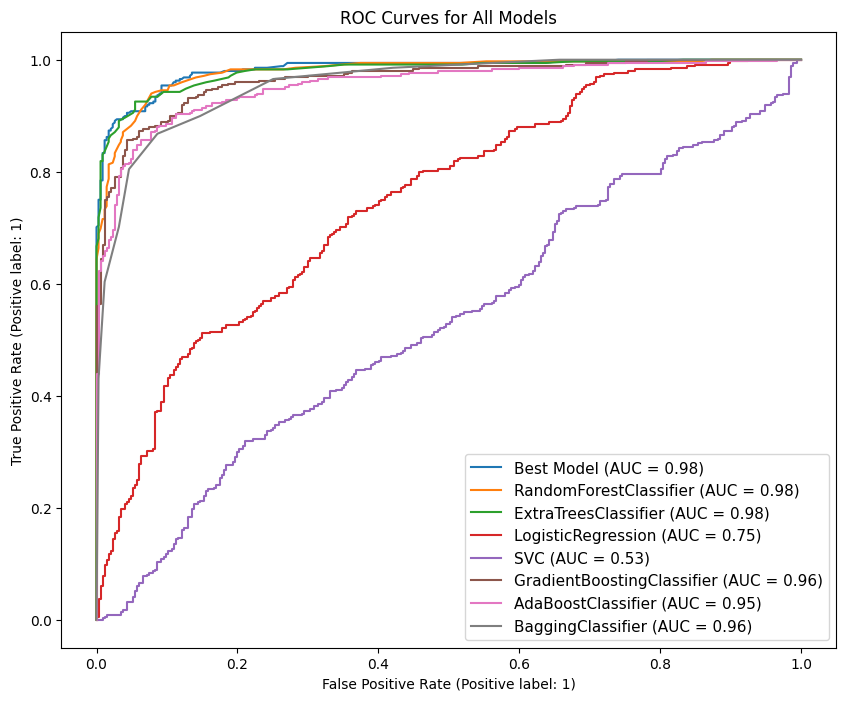

In [154]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Fit all models
for id_model, model in models.items():
    model.fit(x_train, y_train)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC Curve for the best model
RocCurveDisplay.from_estimator(best_model, x_test, y_test, ax=ax, name='Best Model')

# Plot ROC Curve for each model
for id_model, model in models.items():
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, name=id_model)

# Customize and show plot
plt.title('ROC Curves for All Models')
plt.legend(prop={'size':11}, loc='lower right')
plt.show()


### Here we can see the extra tree classifier is the best model

In [155]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "HR_Attrition_model.pkl")

['HR_Attrition_model.pkl']

# Conclusions:

### The final classification model is ExtraTreesClassifier with accuracy_score of 92.37%.